In [3]:
# import and load modules
%reload_ext autoreload
%autoreload 2
import pprint
import numpy as np; import pandas as pd; import math as math; import copy; import statistics
from scipy.ndimage import gaussian_filter as gaussian_filter; import scipy.stats as stats
import statsmodels.api as sm; lowess = sm.nonparametric.lowess; from skimage import transform
from loess.loess_1d import loess_1d; import seaborn as sns
from seaborn import violinplot
from seaborn import load_dataset


#mworks importsc
from mworksbehavior import mwkfiles; from mworksbehavior.imaging import intrinsic as ii; import mworksbehavior as mwb; import mworksbehavior.mwk_io

import matplotlib as mpl; import matplotlib.pyplot as plt; import matplotlib.gridspec as gridspec; from matplotlib import cm; from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable #from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle; from matplotlib.patches import Rectangle

import os, sys; from glob import glob; from pathlib import Path; import pickle
import tifffile as tfl; from datetime import datetime

sys.path.append(Path('src').resolve().as_posix()); 
import quietcell_select_fxns_all as qcsf
import compareQuiet as cQ

#local files and shorthand notations for assigning common functions to variable names
r_ = np.r_; a_ = np.asarray

## Params and paths

In [7]:
# Paths
file_path_root = '/Users/phillipscm/data-local/'
dir_i5273 = os.path.join(file_path_root,'i5273')
dir_pre_i5273 = os.path.join(dir_i5273,'npys-pre/')
dir_post_i5273 = os.path.join(dir_i5273,'npys-post/')

dir_i5214 = os.path.join(file_path_root,'i5214')
dir_pre_i5214 = os.path.join(dir_i5214,'npys-pre/')
dir_post_i5214 = os.path.join(dir_i5214,'npys-post/')

dir_i5309 = os.path.join(file_path_root,'i5309')
dir_pre_i5309 = os.path.join(dir_i5309,'npys-pre/')
dir_post_i5309 = os.path.join(dir_i5309,'npys-post/')

file_path_save = os.path.join(file_path_root)
if not os.path.exists(file_path_save):
    os.makedirs(file_path_save, exist_ok=True)

In [8]:
pre_arrs_i5273 = cQ.load_npys(os.path.join(dir_pre_i5273))
post_arrs_i5273 = cQ.load_npys(os.path.join(dir_post_i5273))

pre_arrs_i5214 = cQ.load_npys(os.path.join(dir_pre_i5214))
post_arrs_i5214 = cQ.load_npys(os.path.join(dir_post_i5214))

pre_arrs_i5309 = cQ.load_npys(os.path.join(dir_pre_i5309))
post_arrs_i5309 = cQ.load_npys(os.path.join(dir_post_i5309))


print(pre_arrs_i5273.keys(),'\n', pre_arrs_i5214.keys(),'\n','\n',pre_arrs_i5309.keys())


dict_keys(['dfoF2P_cell_pre_lseg', 'avgTrial2P_pre', 'avgTrialV_pre', 'dFoF_map_maskV_pre_lseg', 'trial_ftrace_pre_lseg', 'visResp_notStim_pre', 'trial_dfoFsmooth2P_pre', 'trial_dfoFsmoothV_pre', 'visResp_ctrl35um_pre', 'dfoFV_cell_pre_lseg', 'visResp_nearManip_pre', 'visResp_alliC_pre', 'dfV_cell_pre_lseg', 'dFoF_map_mask2P_pre_lseg', 'visResp_behavStim_pre', 'dFoF_map_cell_masksV_pre_lseg', 'avgTrial_cell_pre_lseg', 'dFoF_map_cell_masks2P_pre_lseg', 'trial_dfoFtrace_pre_lseg', 'avgPrestim2P_pre', 'df2P_cell_pre_lseg', 'avgPrestimV_pre', 'twoPResp_manip_pre', 'df_V_pre', 'df_2P_pre', 'twoPResp_ctrl35um_pre']) 
 dict_keys(['dfoF2P_cell_pre_lseg', 'avgTrial2P_pre', 'avgTrialV_pre', 'dFoF_map_maskV_pre_lseg', 'trial_ftrace_pre_lseg', 'visResp_notStim_pre', 'trial_dfoFsmooth2P_pre', 'nostim_iC', 'trial_dfoFsmoothV_pre', 'visResp_ctrl35um_pre', 'dfoFV_cell_pre_lseg', 'visResp_nearManip_pre', 'visResp_alliC_pre', 'dfV_cell_pre_lseg', 'dFoF_map_mask2P_pre_lseg', 'visResp_behavStim_pre', 'dFo

In [37]:
visResp_behavStim_pre = np.concatenate((pre_arrs_i5273['visResp_behavStim_pre'],pre_arrs_i5214['visResp_behavStim_pre'],pre_arrs_i5309['visResp_behavStim_pre']))
visResp_notStim_pre = np.concatenate((pre_arrs_i5273['visResp_ctrl35um_pre'],pre_arrs_i5214['visResp_ctrl35um_pre'],pre_arrs_i5309['visResp_ctrl35um_pre']))
visResp_nearManip_pre = np.concatenate((pre_arrs_i5273['visResp_nearManip_pre'],pre_arrs_i5214['visResp_nearManip_pre'],pre_arrs_i5309['visResp_nearManip_pre']))
visResp_alliC_pre = np.concatenate((pre_arrs_i5273['visResp_alliC_pre'],pre_arrs_i5214['visResp_alliC_pre'],pre_arrs_i5309['visResp_alliC_pre']))

visResp_behavStim_post = np.concatenate((post_arrs_i5273['visResp_behavStim_post'],post_arrs_i5214['visResp_behavStim_post'],post_arrs_i5309['visResp_behavStim_post']))
visResp_notStim_post = np.concatenate((post_arrs_i5273['visResp_ctrl35um_post'],post_arrs_i5214['visResp_ctrl35um_post'],post_arrs_i5309['visResp_ctrl35um_post']))
visResp_nearManip_post = np.concatenate((post_arrs_i5273['visResp_nearManip_post'],post_arrs_i5214['visResp_nearManip_post'],post_arrs_i5309['visResp_nearManip_post']))
visResp_alliC_post = np.concatenate((post_arrs_i5273['visResp_alliC_post'],post_arrs_i5214['visResp_alliC_post'],post_arrs_i5309['visResp_alliC_post']))


In [39]:
twoP_manip_pre = np.concatenate((pre_arrs_i5273['twoPResp_manip_pre'],pre_arrs_i5214['twoPResp_manip_pre'],pre_arrs_i5309['twoPResp_manip_pre']))
twoP_ctrl_pre = np.concatenate((pre_arrs_i5273['twoPResp_ctrl35um_pre'],pre_arrs_i5214['twoPResp_ctrl35um_pre'],pre_arrs_i5309['twoPResp_ctrl35um_pre']))

twoP_manip_post = np.concatenate((post_arrs_i5273['twoPResp_manip_post'],post_arrs_i5214['twoPResp_manip_post'],post_arrs_i5309['twoPResp_manip_post']))
twoP_ctrl_post = np.concatenate((post_arrs_i5273['twoPResp_ctrl35um_post'],post_arrs_i5214['twoPResp_ctrl35um_post'],post_arrs_i5309['twoPResp_ctrl35um_post']))


### random stuff

In [41]:
i_notStimResponsive = np.where(visResp_notStim_pre[:,3] > 2.5)[0]

In [42]:
stat, p_post = stats.mannwhitneyu(visResp_behavStim_post, visResp_notStim_post)

### Avg resp across cells polar plots

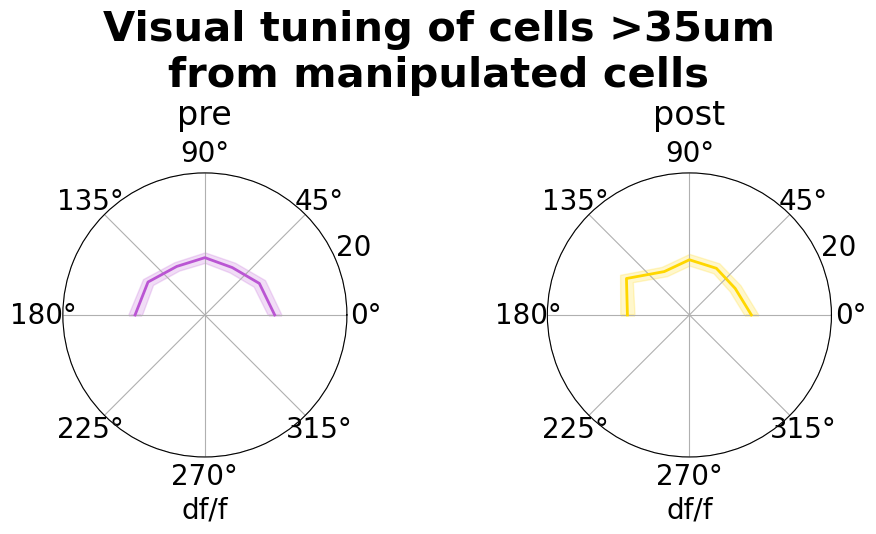

In [43]:
#polar plots avgs
title = 'Visual tuning of cells >35um\nfrom manipulated cells'
dfoF_V_avg_array_pre_active = np.copy(visResp_notStim_pre[i_notStimResponsive,:])
#dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(visResp_notStim_post[i_notStimResponsive,:])
#dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0)
avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
sem_visresp_pre = stats.sem(dfoF_V_avg_array_pre_active, axis=(0),nan_policy='omit')
sem_visresp_pre = np.concatenate((sem_visresp_pre, sem_visresp_pre[:1]))

avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0)
avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
sem_visresp_post = stats.sem(dfoF_V_avg_array_post_active, axis=(0),nan_policy='omit')
sem_visresp_post = np.concatenate((sem_visresp_post, sem_visresp_post[:1]))

avg_visresps = np.array([avg_visresp_pre, avg_visresp_post])
sem_visresps = np.array([sem_visresp_pre, sem_visresp_post])

xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

fig= plt.figure(figsize=(10,8))
fig.text(0.5, 1.02, title, ha='center', va='center', fontsize=30, fontweight='bold')
tuning_titles = ['pre', 'post']; colors = ['mediumorchid', 'gold']
font = {'size'   : 20}
mpl.rc('font', **font)

for plots in range(2):
    ax1 = fig.add_subplot(221+plots, projection='polar')
    ax1.plot(xs,avg_visresps[plots, :],color=colors[plots],lw=2)
    ax1.fill_between(xs,avg_visresps[plots, :]+sem_visresps[plots, :],avg_visresps[plots, :]-sem_visresps[plots, :],color=colors[plots],alpha=0.2)
    ax1.set_rmax(20); ax1.set_rticks([20])  # Less radial ticks
    ax1.set_xlabel('df/f'); ax1.set_title(tuning_titles[plots], va='bottom')
    ax1.grid(True)
#fig.subplots_adjust(bottom=0.0, top=1.4, left=0.6, right=0.7, wspace=0.0, hspace=0.0)
    
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
#plt.savefig(file_path_save+'polarplot_nonmanipcells.png',bbox_inches='tight',dpi=400)
#print('Response map completed. Figure saved at '+file_path+'visTuningofGroups')

dfoF_V_change_ctrl = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active

avg_visresp_pre_notStim = np.copy(avg_visresp_pre)
avg_visresp_post_notStim = np.copy(avg_visresp_post)

sem_visresp_pre_noStim = np.copy(sem_visresp_pre)
sem_visresp_post_noStim = np.copy(sem_visresp_post)

In [12]:
pre_arrs_i5273.keys()

dict_keys(['dfoF2P_cell_pre_lseg', 'avgTrial2P_pre', 'avgTrialV_pre', 'dFoF_map_maskV_pre_lseg', 'trial_ftrace_pre_lseg', 'visResp_notStim_pre', 'trial_dfoFsmooth2P_pre', 'trial_dfoFsmoothV_pre', 'visResp_ctrl35um_pre', 'dfoFV_cell_pre_lseg', 'visResp_nearManip_pre', 'visResp_alliC_pre', 'dfV_cell_pre_lseg', 'dFoF_map_mask2P_pre_lseg', 'visResp_behavStim_pre', 'dFoF_map_cell_masksV_pre_lseg', 'avgTrial_cell_pre_lseg', 'dFoF_map_cell_masks2P_pre_lseg', 'trial_dfoFtrace_pre_lseg', 'avgPrestim2P_pre', 'df2P_cell_pre_lseg', 'avgPrestimV_pre', 'twoPResp_manip_pre', 'df_V_pre', 'df_2P_pre', 'twoPResp_ctrl35um_pre'])

In [15]:
pre_arrs_i5273['trial_ftrace_pre_lseg'].shape

(349, 16, 30, 140)

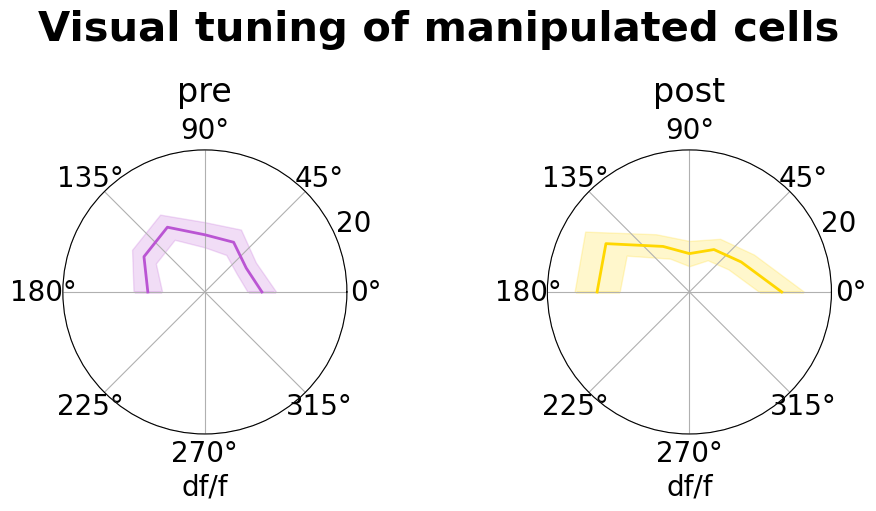

In [44]:
#polar plots avgs
title = 'Visual tuning of manipulated cells'
dfoF_V_avg_array_pre_active = np.copy(visResp_behavStim_pre)#[i_manipResponsive,:])
#dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(visResp_behavStim_post)#[i_manipResponsive,:])
#dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0)
avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
sem_visresp_pre = stats.sem(dfoF_V_avg_array_pre_active, axis=(0),nan_policy='omit')
sem_visresp_pre = np.concatenate((sem_visresp_pre, sem_visresp_pre[:1]))

avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0)
avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
sem_visresp_post = stats.sem(dfoF_V_avg_array_post_active, axis=(0),nan_policy='omit')
sem_visresp_post = np.concatenate((sem_visresp_post, sem_visresp_post[:1]))

avg_visresps = np.array([avg_visresp_pre, avg_visresp_post])
sem_visresps = np.array([sem_visresp_pre, sem_visresp_post])

xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

fig= plt.figure(figsize=(10,8))
fig.text(0.5, 1.02, title, ha='center', va='center', fontsize=30, fontweight='bold')
tuning_titles = ['pre', 'post']; colors = ['mediumorchid', 'gold']
font = {'size'   : 20}
mpl.rc('font', **font)

for plots in range(2):
    ax1 = fig.add_subplot(221+plots, projection='polar')
    ax1.plot(xs,avg_visresps[plots, :],color=colors[plots],lw=2)
    ax1.fill_between(xs,avg_visresps[plots, :]+sem_visresps[plots, :],avg_visresps[plots, :]-sem_visresps[plots, :],color=colors[plots],alpha=0.2)
    ax1.set_rmax(20); ax1.set_rticks([20])  # Less radial ticks
    ax1.set_xlabel('df/f'); ax1.set_title(tuning_titles[plots], va='bottom')
    ax1.grid(True)
#fig.subplots_adjust(bottom=0.0, top=1.4, left=0.6, right=0.7, wspace=0.0, hspace=0.0)
    
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
#plt.savefig(file_path_save+'polarplot_manipcells.png',bbox_inches='tight',dpi=400)
#print('Response map completed. Figure saved at '+file_path+'visTuningofGroups')

dfoF_V_change_bhStim = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active

avg_visresp_pre_bhavStim = np.copy(avg_visresp_pre)
avg_visresp_post_bhavStim = np.copy(avg_visresp_post)

sem_visresp_pre_bhavStim = np.copy(sem_visresp_pre)
sem_visresp_post_bhavStim = np.copy(sem_visresp_post)

In [45]:
# Appending the 0 deg column to the end for the +90 condition
add_col = np.expand_dims(dfoF_V_avg_array_pre_active[:,0],axis=1)
bhStim_pre = np.append(dfoF_V_avg_array_pre_active,add_col,axis=1)

add_col = np.expand_dims(dfoF_V_avg_array_post_active[:,0],axis=1)
bhStim_post = np.append(dfoF_V_avg_array_post_active,add_col,axis=1)

# Checking if the appropriate column was appended:
print(f"Do the first and last columns of the visual response match?: {all((bhStim_post[:,0] == bhStim_post[:,-1]))}")

Do the first and last columns of the visual response match?: True


/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_35670/3651763597.py:38: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([pre, post],labels=state_labels, loc='upper left')


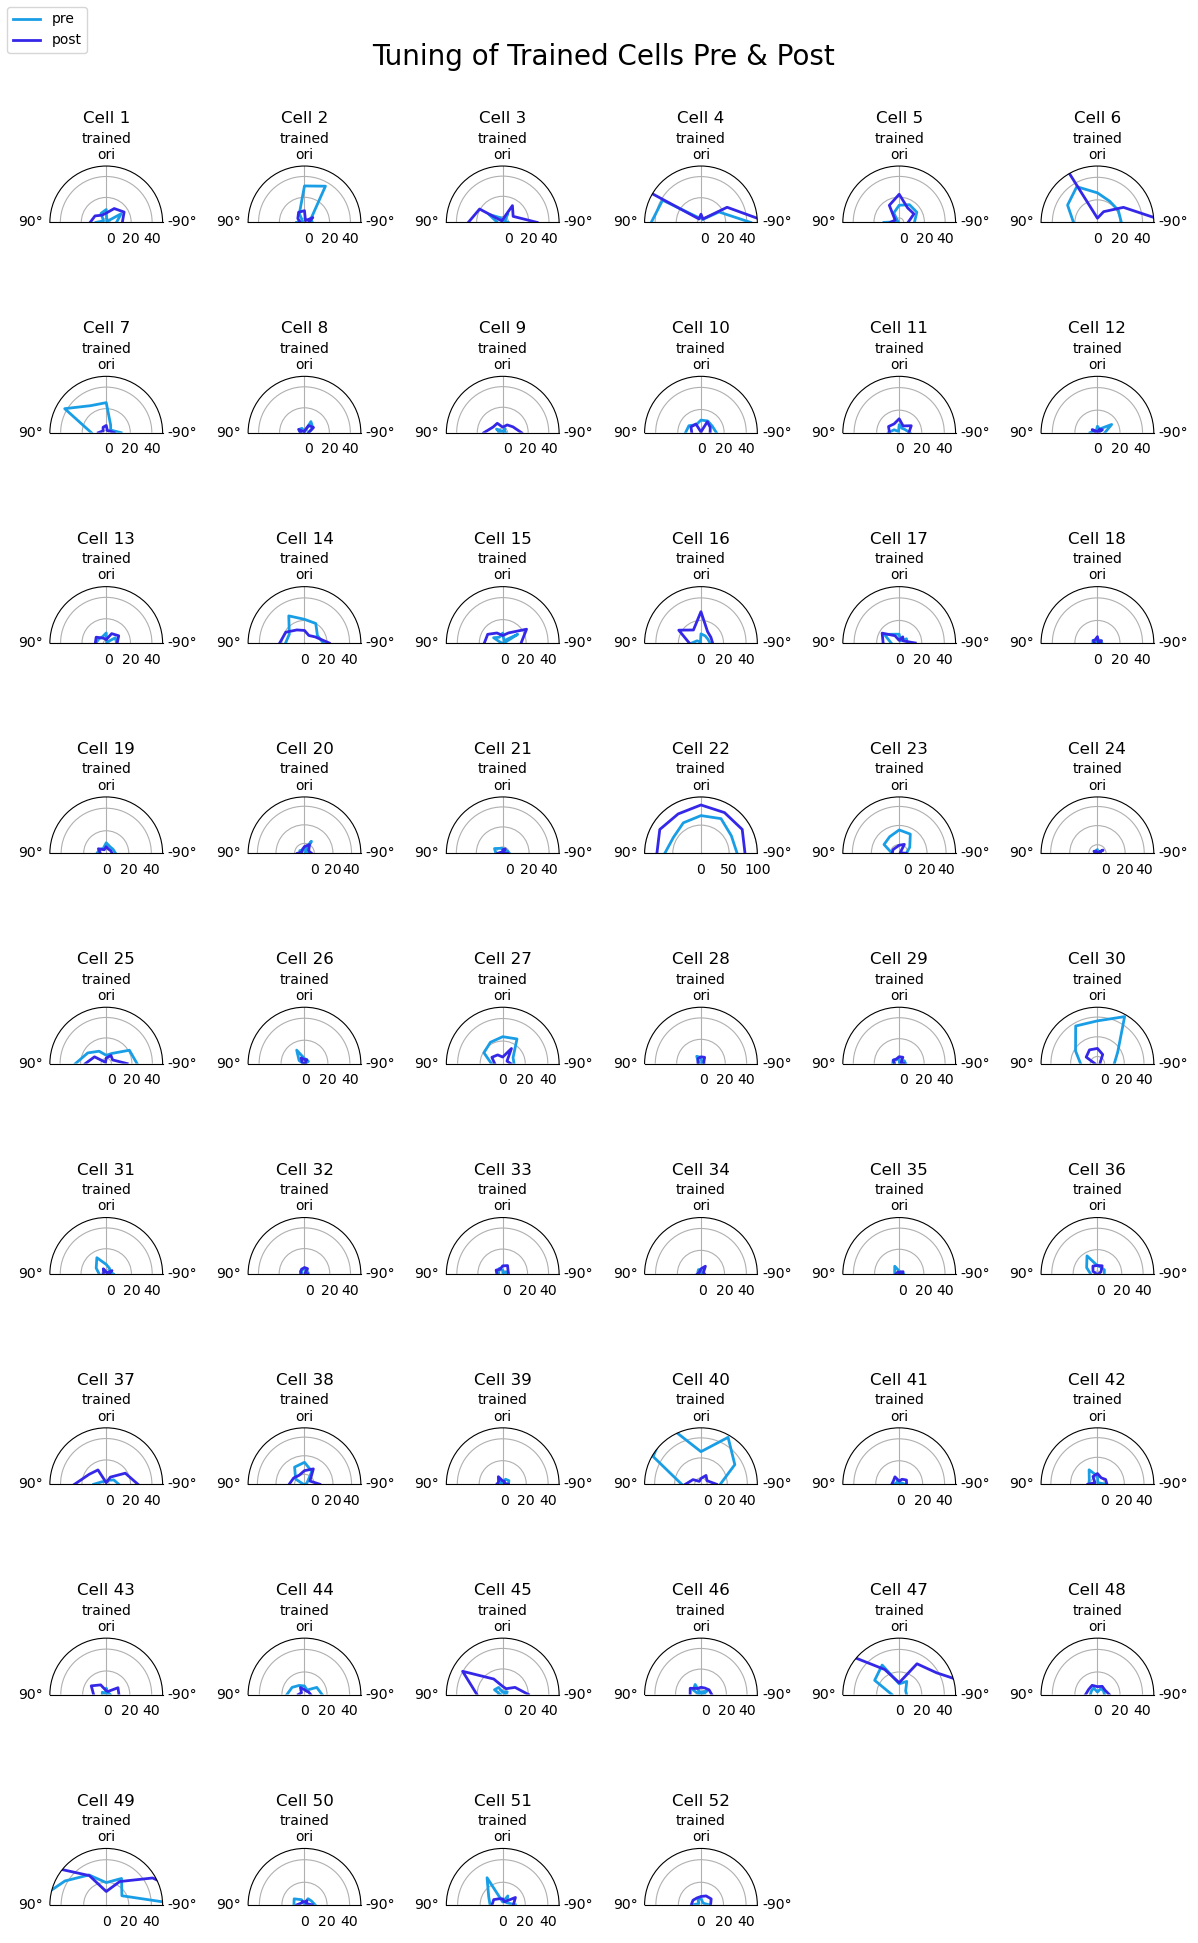

In [49]:
# Plotting all the changes in tuning 

# Set the dimensions of the subplot grid
rows, cols = 9, 6

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20),subplot_kw={'projection': 'polar'})
xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

axes = axes.flatten()

pre_color = [x/255 for x in [25, 158, 230]]
post_color = [x/255 for x in [52, 39, 232]]
state_labels = ['pre', 'post']
# Iterate through each subplot
for i in range(dfoF_V_change_bhStim.shape[0]):
    ax = axes[i]
    pre = ax.plot(xs,bhStim_pre[i,:],lw=2,color=pre_color,label='pre')
    post = ax.plot(xs,bhStim_post[i,:],lw=2,color=post_color,label='post')
    ax.axhline(0, color='gray',lw=0.5,linestyle='--')

    # To account for a cell with higher responses 
    if i == 21:
        ax.set_rmax(100)
        ax.set_rticks([0,50,100])
    else:
        ax.set_rmax(50)
        ax.set_rticks([0,20,40])
        
    ax.set_thetamin(0)
    ax.set_thetamax(180)
    
    ax.set_title(f'Cell {i + 1}', fontsize=12)
    ax.set_xticks(
        ticks=[0, np.pi*0.5, np.pi],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    
fig.legend([pre, post],labels=state_labels, loc='upper left')
plt.tight_layout()
plt.rcParams.update({'font.size': 10}) 
fig.suptitle("Tuning of Trained Cells Pre & Post", fontsize = 20)
fig.subplots_adjust(top=0.95)

axes[52].set_visible(False)
axes[53].set_visible(False)

plt.show()
plt.rcParams.update({'font.size': 10}) 


/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_35670/4247381550.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([pre, post],labels=labels, loc='upper left')


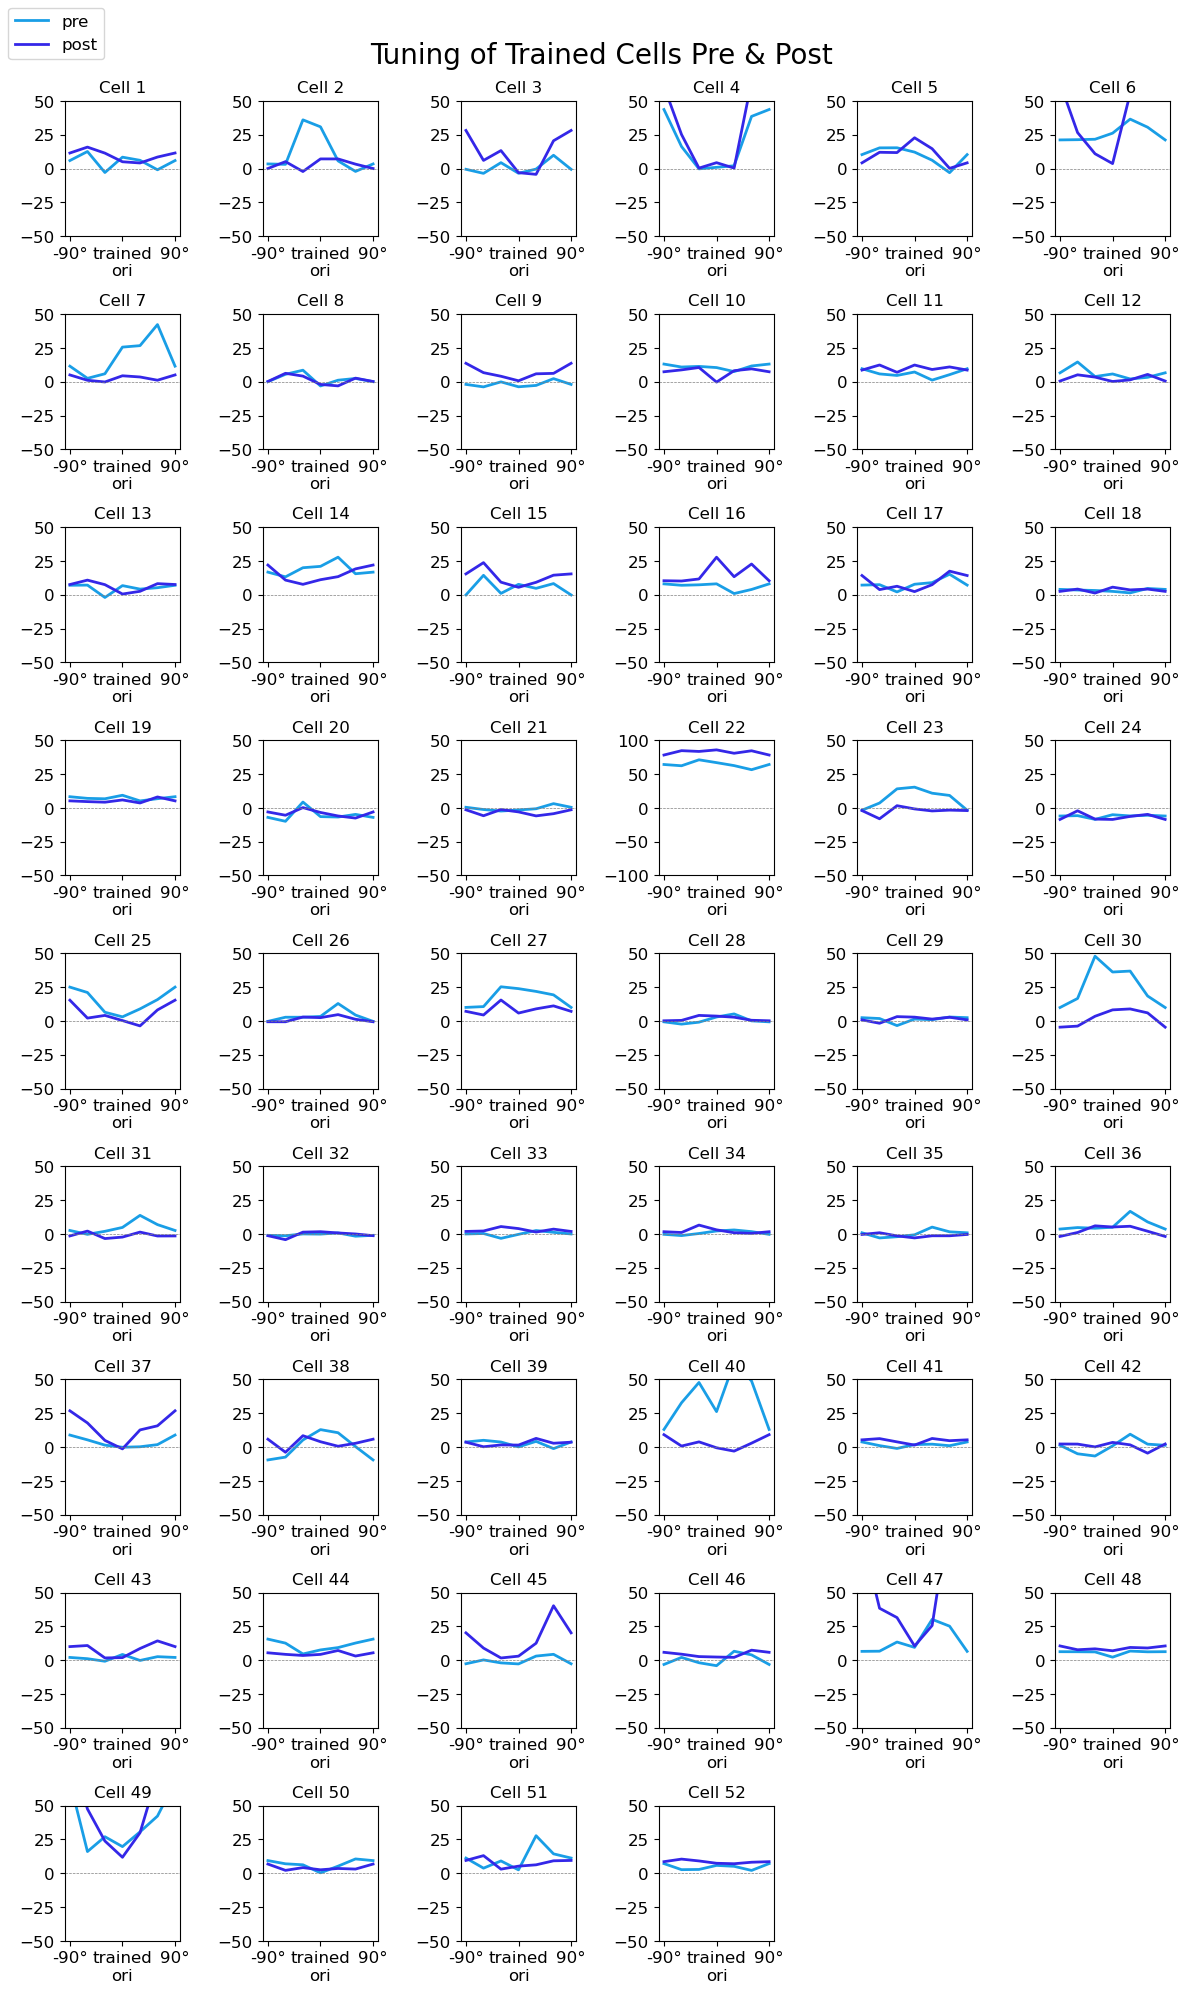

In [190]:
# Plotting all the changes in tuning 

# Set the dimensions of the subplot grid
rows, cols = 9, 6

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

axes = axes.flatten()

# Iterate through each subplot
for i in range(dfoF_V_change_bhStim.shape[0]):
        
    ax = axes[i]
    ax.plot(xs,bhStim_pre[i,:],lw=2,color=pre_color)
    ax.plot(xs,bhStim_post[i,:],lw=2,color=post_color)
    ax.axhline(0, color='gray',lw=0.5,linestyle='--')
    
    # To account for a cell with higher responses 
    if i == 21:
        ax.set_ylim([-100, 100])
    else:
        ax.set_ylim([-50, 50])
        
    ax.set_title(f'Cell {i + 1}', fontsize=12)
    ax.set_xticks(
        ticks=[0, np.pi*0.5, np.pi],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])

fig.legend([pre, post],labels=labels, loc='upper left')
plt.tight_layout()
plt.rcParams.update({'font.size': 10}) 
fig.suptitle("Tuning of Trained Cells Pre & Post", fontsize = 20)
fig.subplots_adjust(top=0.95)
axes[52].axis('off') 
axes[53].set_visible(False)
plt.show()

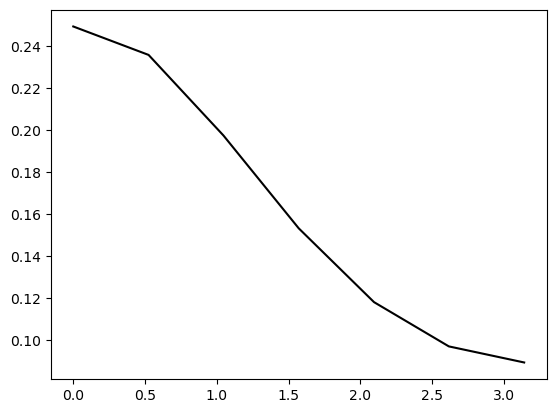

In [192]:
mu, std, blah = stats.vonmises.fit(bhStim_pre[0:])
p = stats.vonmises.pdf(xs,mu,std)
plt.plot(xs,p,'k')
plt.show()

NameError: name 'sample_size' is not defined

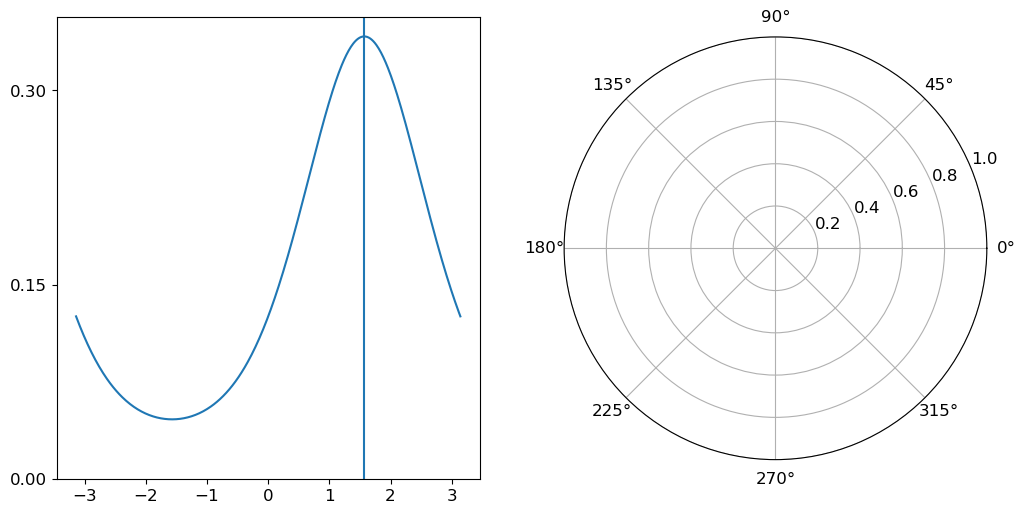

In [181]:
# Fitting a von mises distribution to our data 

loc = 0.5 * np.pi
kappa = 1 

fig = plt.figure(figsize=(12, 6))
left = plt.subplot(121)
right = plt.subplot(122, projection='polar')
x = np.linspace(-np.pi, np.pi, 500)
vonmises_pdf = stats.vonmises.pdf(x, loc=loc, kappa=kappa)
ticks = [0, 0.15, 0.3]

left.plot(x, vonmises_pdf)
left.axvline(1.57)
left.set_yticks(ticks)
number_of_bins = int(np.sqrt(sample_size))
left.hist(sample, density=True, bins=number_of_bins)
left.set_title("Cartesian plot")
left.set_xlim(-np.pi, np.pi)
left.grid(True)

right.plot(x, vonmises_pdf, label="PDF")
right.set_yticks(ticks)
right.hist(sample, density=True, bins=number_of_bins,
           label="Histogram")
right.set_title("Polar plot")
right.legend(bbox_to_anchor=(0.15, 1.06))

In [100]:
# Calculating the number of quiet cells in our data
pre_quiet_cells = [all(np.abs(dfoF_V_avg_array_pre_active[row,:]) < 10) for row in range(dfoF_V_avg_array_pre_active.shape[0])]
post_quiet_cells = [all(np.abs(dfoF_V_avg_array_post_active[row,:]) < 10) for row in range(dfoF_V_avg_array_post_active.shape[0])]
stay_quiet_cells = np.logical_and(pre_quiet_cells,post_quiet_cells)
print("Number of starting quiet cells: %i" % len([i for i, x in enumerate(pre_quiet_cells) if x]))
print("Number of ending quiet cells: %i" % len([i for i, x in enumerate(post_quiet_cells) if x]))
print("Cells that remained quiet: %i" % len([i for i, x in enumerate(stay_quiet_cells) if x]))

Number of starting quiet cells: 26
Number of ending quiet cells: 28
Cells that remained quiet: 16


In [100]:
# Calculating the number of quiet cells in our data
pre_quiet_cells = [all(np.abs(dfoF_V_avg_array_pre_active[row,:]) < 10) for row in range(dfoF_V_avg_array_pre_active.shape[0])]
post_quiet_cells = [all(np.abs(dfoF_V_avg_array_post_active[row,:]) < 10) for row in range(dfoF_V_avg_array_post_active.shape[0])]
stay_quiet_cells = np.logical_and(pre_quiet_cells,post_quiet_cells)
print("Number of starting quiet cells: %i" % len([i for i, x in enumerate(pre_quiet_cells) if x]))
print("Number of ending quiet cells: %i" % len([i for i, x in enumerate(post_quiet_cells) if x]))
print("Cells that remained quiet: %i" % len([i for i, x in enumerate(stay_quiet_cells) if x]))

Number of starting quiet cells: 26
Number of ending quiet cells: 28
Cells that remained quiet: 16


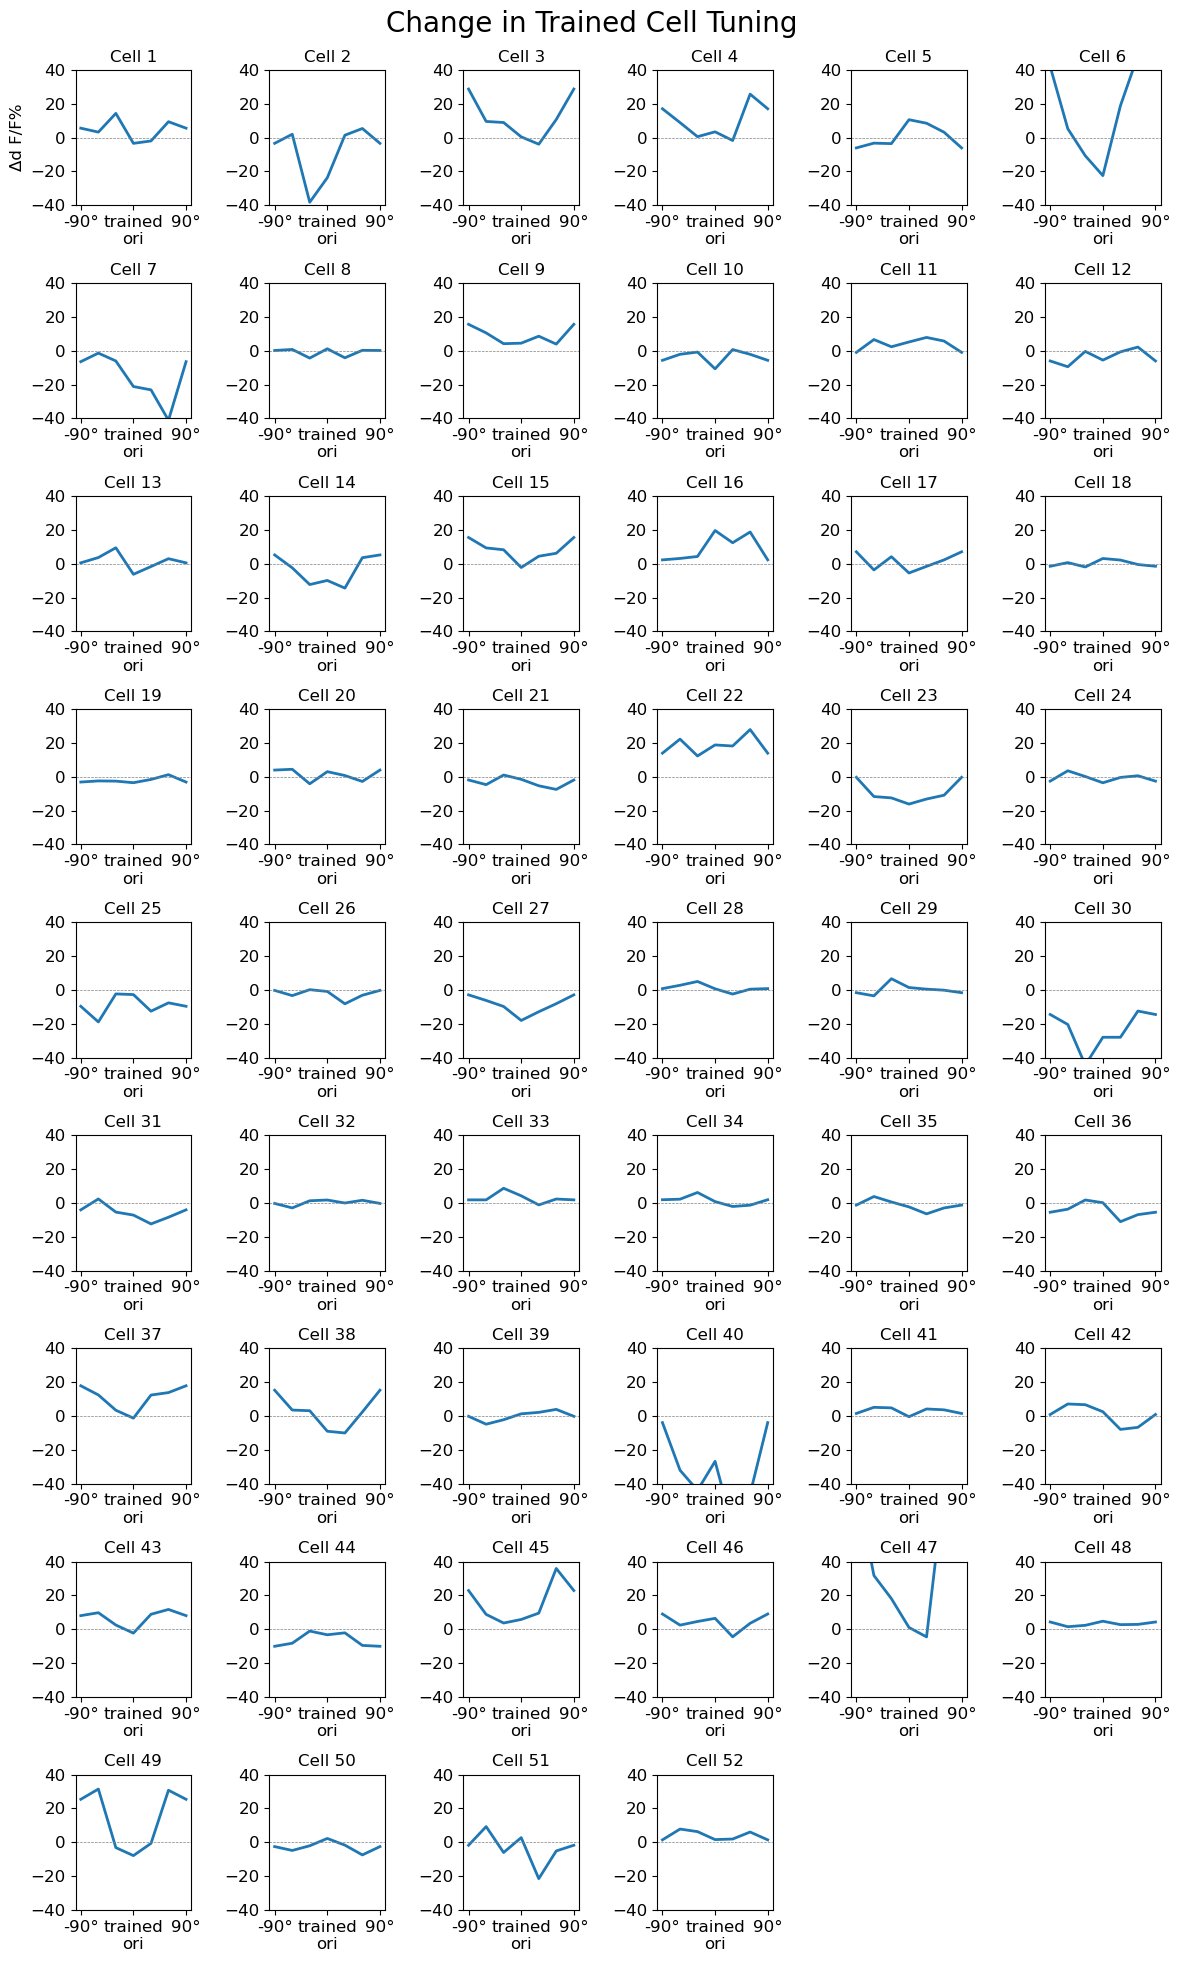

In [202]:
# Plotting all the changes in tuning 

# Set the dimensions of the subplot grid
rows, cols = 9, 6

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 20))
axes = axes.flatten() # to make iterable

xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

add_col = np.expand_dims(dfoF_V_change_bhStim[:,0],axis=1)
bhStim_total = np.append(dfoF_V_change_bhStim,add_col,axis=1)

# Iterate through each subplot
for i in range(dfoF_V_change_bhStim.shape[0]):
    ax = axes[i]
    ax.plot(xs,bhStim_total[i,:],lw=2)
    ax.axhline(0, color='gray',lw=0.5,linestyle='--')
    ax.set_ylim([-40, 40])
    ax.set_title(f'Cell {i + 1}', fontsize=12)
    ax.set_xticks(
        ticks=[0, np.pi*0.5, np.pi],
        labels=["-90\u00b0", "trained\nori", "90\u00b0"])
    
    if i == 0:
        ax.set_ylabel('\u0394d F/F%')

plt.tight_layout()
plt.rcParams.update({'font.size': 12}) 
fig.suptitle("Change in Trained Cell Tuning", fontsize = 20)
fig.subplots_adjust(top=0.95)
axes[52].axis('off') 
axes[53].set_visible(False)
plt.show()

In [146]:
# Creating numpy arrays for the panda dataframe
plot_stim_labels = ["\u00b1 90\u00b0","60\u00b0","30\u00b0","trained ori","-30\u00b0","\u00b1 -60"]
stim_types = ["-90\u00b0","-60\u00b0","-30\u00b0","trained ori","+30\u00b0","+60\u00b0"]

# Initializing arrays for dataframe
mat_temp = np.empty((dfoF_V_change_bhStim.shape[0],3), dtype = 'object')
stim_temp = np.empty(dfoF_V_change_bhStim.shape[0], dtype = 'object')
cell_type_temp = np.empty(dfoF_V_change_bhStim.shape[0], dtype = 'object')
cell_type_temp[:] = "trained cells"
save = np.empty((dfoF_V_change_bhStim.shape[0],3), dtype = 'object')

# Initializing original matrix 
save[:,0] = dfoF_V_change_bhStim[:,0]
stim_temp[:] = stim_types[0]
save[:,1] = stim_temp
save[:,2] = cell_type_temp

# Making a matrix of trained cells with stim responses
for col in range(dfoF_V_change_bhStim.shape[1]):
    mat_temp[:,0] = dfoF_V_change_bhStim[:,col]
    stim_temp[:] = stim_types[col]
    mat_temp[:,1] = stim_temp
    mat_temp[:,2] = cell_type_temp

    save = np.vstack((save,mat_temp))

##   
# Repeat for the control 
mat_temp = np.empty((dfoF_V_change_ctrl.shape[0],3), dtype = 'object')
stim_temp = np.empty(dfoF_V_change_ctrl.shape[0], dtype = 'object')
cell_type_temp = np.empty(dfoF_V_change_ctrl.shape[0], dtype = 'object')
cell_type_temp[:] = "control cells"
ctrl_save = np.empty((dfoF_V_change_ctrl.shape[0],3), dtype = 'object')

# Initializing control matrix
ctrl_save[:,0] = dfoF_V_change_ctrl[:,0]
stim_temp[:] = stim_types[0]
ctrl_save[:,1] = stim_temp
ctrl_save[:,2] = cell_type_temp

# Making a matrix of control cells with stim responses
for col in range(dfoF_V_change_ctrl.shape[1]):
    mat_temp[:,0] = dfoF_V_change_ctrl[:,col]
    stim_temp[:] = stim_types[col]
    mat_temp[:,1] = stim_temp
    mat_temp[:,2] = cell_type_temp
    
    ctrl_save = np.vstack((ctrl_save,mat_temp))



364


1197

In [170]:
# Creating dataframe using arrays from the last cell 
data = np.append(save,ctrl_save,axis=0)
data_dict = {'response': data[:,0].astype('float'), 'stim': data[:,1], 'cell type': data[:,2]}
combined = pd.DataFrame(data_dict)

# Reorganizing dataframe to have +/- stim indices instead of individual indicies 
col_save = combined["stim"]
combined = combined.set_index("stim",drop=False)
combined["stim"].loc[["-30\u00b0","+30\u00b0"]] = "\u00b1 30\u00b0"
combined["stim"].loc[["-60\u00b0","+60\u00b0"]] = "\u00b1 60\u00b0"
combined["stim"].loc[["-90\u00b0"]] = "\u00b1 90\u00b0"
combined.reset_index(drop=True, inplace=True)

# Adding back stim column so that both can be indexed and reordering columns for better visual
all_data = combined.rename(columns={"stim": "grouped stim"}, errors="raise")
all_data = all_data.join(col_save)
all_data = all_data.loc[:, ['response','stim','grouped stim','cell type']]
all_data

/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_35670/2469525809.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["stim"].loc[["-30\u00b0","+30\u00b0"]] = "\u00b1 30\u00b0"
/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_35670/2469525809.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined["stim"].loc[["-60\u00b0","+60\u00b0"]] = "\u00b1 60\u00b0"
/var/folders/jz/44sr7v096p1d9w_7_z1267br0000gs/T/ipykernel_35670/2469525809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

,response,stim,grouped stim,cell type
0,5.586448,-90°,± 90°,trained cells
1,-3.375957,-90°,± 90°,trained cells
2,28.728520,-90°,± 90°,trained cells
3,17.068392,-90°,± 90°,trained cells
4,-6.085673,-90°,± 90°,trained cells
...,...,...,...,...
1556,3.499306,+60°,± 60°,control cells
1557,-2.280621,+60°,± 60°,control cells
1558,2.249167,+60°,± 60°,control cells
1559,-6.745931,+60°,± 60°,control cells


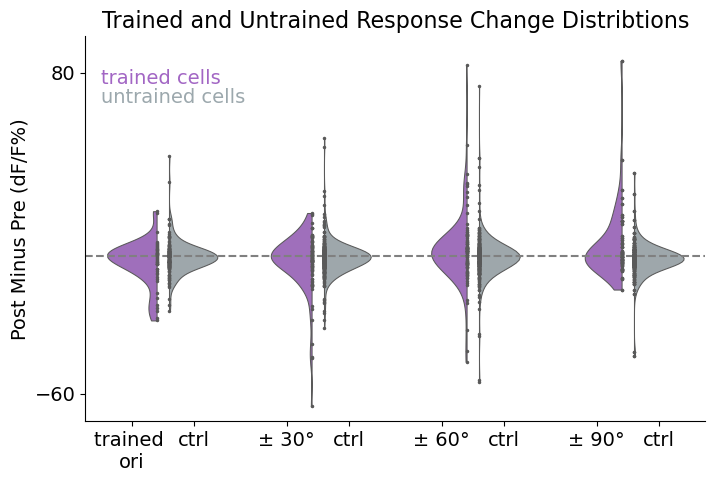

<Figure size 640x480 with 0 Axes>

In [173]:
all_data['mixed_cat'] = all_data['stim'] + all_data['cell type'] 

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)
plt.rcParams.update({'font.size': 14}) 

# Specifying the order of the data I want
stim_order = ["trained ori", "\u00b1 30\u00b0", "\u00b1 60\u00b0", "\u00b1 90\u00b0"]
group_order = ["trained cells", "control cells"]

# Create mapping for x positions so that the violins are plotted in the correct order 
x_positions = {f"{cat}": i for i, cat in enumerate(stim_order)}

# Mapping value to plot againsts
all_data["X_Pos"] = all_data["grouped stim"].map(x_positions)

# Making + assigning colors
gray = [x/255 for x in [156, 168, 173]]
purple = [x/255 for x in [162, 102, 196]]

custom_palette = {
    "trained cells": purple,
    "control cells": gray
}

# Plotting 
ax1.axhline(0, color = 'grey', linestyle='--')
sns.violinplot(data = all_data, x='X_Pos', y='response',hue='cell type',
               split=True, bw_method = 0.4, cut = 0, gap = 0.2, 
               inner='point', palette = custom_palette, linewidth = 0.75, saturation = 0.8)

x_labels = ["trained \nori", "ctrl", "\u00b1 30\u00b0", "ctrl", "\u00b1 60\u00b0", "ctrl", "\u00b1 90\u00b0", "ctrl"]

# Create mapping for x positions
x_tick_positions = [ i - 0.2 + 0.4 * j 
    for i, cat in enumerate(stim_order)
    for j, grp in enumerate(group_order) ]

# Customize x-tick labels
plt.xticks(
    ticks=x_tick_positions,
    labels=x_labels
)

# Plot details 
plt.ylabel("Post Minus Pre (dF/F%)")
plt.xlabel("")
plt.legend('', frameon=False)
ax1.set_ylim([-60*1.2, 80*1.2])
ax1.set_yticks([-60, 80])
spacer = 8
xpos = -0.4
ypos = 75
plt.text(xpos,ypos,"trained cells", color = purple)
plt.text(xpos,ypos-spacer,"untrained cells", color = gray)

ax1.spines[['right', 'top']].set_visible(False)
# Rotate and format if necessary
plt.title("Trained and Untrained Response Change Distribtions", fontsize =16)
plt.show()

# Save ex
plt.savefig(file_path_save+'Cell Norm Mag Diff.png',bbox_inches='tight',dpi=400)


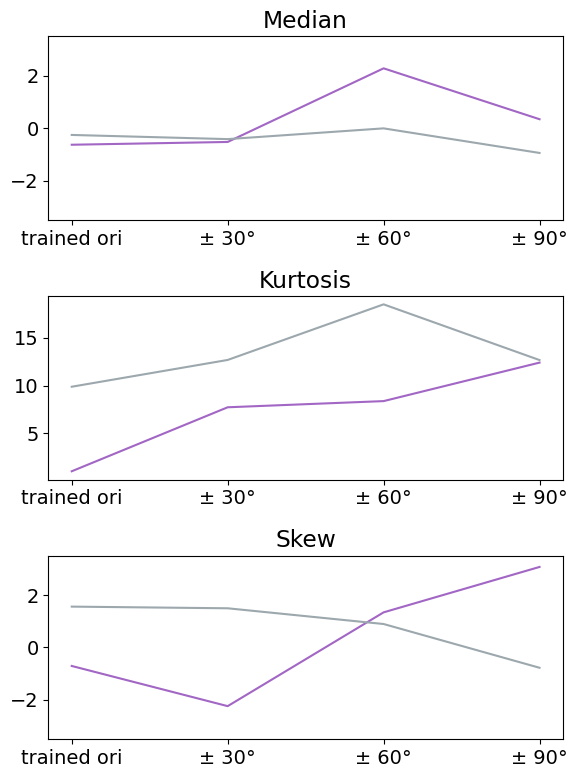

In [175]:
# Creating plots of the Median, Skew, and Kurtosis for each distribution 
stims = all_data["grouped stim"].unique()
ordered_stims = stims[::-1]

fig, axes = plt.subplots(3, 1, figsize=(6, 8))
colors = [purple, gray]

for ind, cell in enumerate(all_data["cell type"].unique()):

    # cells is the correct cell_type 
    cells = all_data[all_data["cell type"] == cell]
    cells = cells.set_index("grouped stim",drop=False)
    
    # Stats calculation
    median = [statistics.median(cells["response"].loc[ori]) for ori in ordered_stims]
    kurt = [stats.kurtosis(cells["response"].loc[ori]) for ori in ordered_stims]
    skew = [stats.skew(cells["response"].loc[ori]) for ori in ordered_stims]
    
    # Plot 
    axes[0].plot(ordered_stims, median, color = colors[ind])
    axes[0].set_title("Median"); axes[0].set_ylim([-3.5, 3.5]); axes[0].set_yticks([-2, 0 ,2])
    axes[1].plot(ordered_stims, kurt, color = colors[ind])
    axes[1].set_title("Kurtosis")
    axes[2].plot(ordered_stims, skew, color = colors[ind])
    axes[2].set_title("Skew"); axes[2].set_ylim([-3.5, 3.5]); axes[2].set_yticks([-2, 0 ,2])
    
    plt.tight_layout()


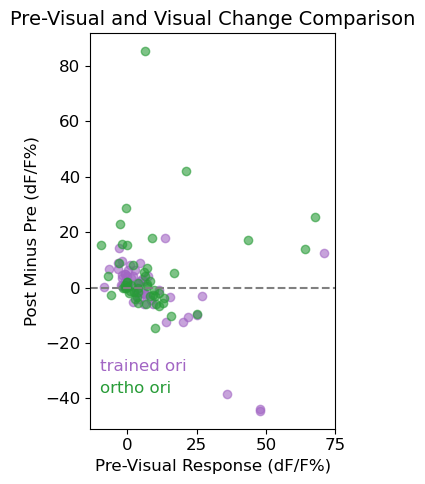

In [203]:
# Creating scatter plots of cell responses as organized by pre-responses
# Note: I think it is important this plot has scaled axes to compare effects

# Indexing the trained orientation which is i=2 
pre_trained_resp = dfoF_V_avg_array_pre_active[:,2]
trained_resp = dfoF_V_change_bhStim[:,2]

# Same for ortho
pre_ortho_resp = dfoF_V_avg_array_pre_active[:,0]
ortho_resp = dfoF_V_change_bhStim[:,0]

# Plotting 
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12}) 

ax1 = fig.add_subplot(111)
green = [x/255 for x in [40, 156, 56]]

plt.scatter(pre_trained_resp,trained_resp, color = purple, alpha =0.6)
plt.scatter(pre_ortho_resp,ortho_resp, color = green, alpha =0.6)


ax1.set_title("Pre-Visual and Visual Change Comparison", fontsize = 14)
ax1.axhline(0, color = "gray", linestyle = "--")
plt.ylabel("Post Minus Pre (dF/F%)")
plt.xlabel("Pre-Visual Response (dF/F%)")
ax1.set_aspect('equal') # IMPORTANT 
xpos = -10
ypos = -30
plt.text(xpos,ypos, "trained ori", color = purple)
plt.text(xpos,ypos-spacer,"ortho ori", color = green)
plt.tight_layout()

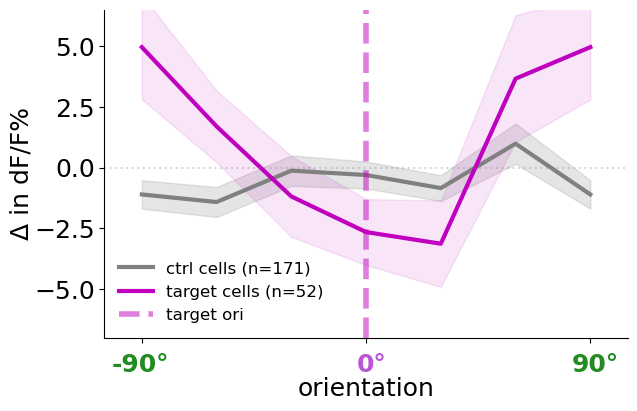

In [124]:
avg_ctrl = np.nanmean(dfoF_V_change_ctrl, axis=0)
avg_ctrl = np.concatenate((avg_ctrl, avg_ctrl[:1]))
avg_bhStim = np.nanmean(dfoF_V_change_bhStim, axis=0)
avg_bhStim = np.concatenate((avg_bhStim, avg_bhStim[:1]))

sem_ctrl = stats.sem(dfoF_V_change_ctrl, axis=(0),nan_policy='omit')
sem_ctrl = np.concatenate((sem_ctrl, sem_ctrl[:1]))
sem_bhStim = stats.sem(dfoF_V_change_bhStim, axis=(0),nan_policy='omit')
sem_bhStim = np.concatenate((sem_bhStim, sem_bhStim[:1]))

difs = [avg_ctrl, avg_bhStim]

fig= plt.figure(figsize=(12,8))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['grey', 'm']
font = {'size'   : 18}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')
xs = [0,1,2,3,4,5,6]

ax1 = fig.add_subplot(221+plots)
ax1.plot(difs[0],color=colors[0],lw=3,label='ctrl cells (n=171)')
ax1.plot(difs[1],color=colors[1],lw=3,label='target cells (n=52)')
ax1.fill_between(xs,difs[0]+sem_ctrl,difs[0]-sem_ctrl,color=colors[0],alpha=0.2)
ax1.fill_between(xs,difs[1]+sem_bhStim,difs[1]-sem_bhStim,color=colors[1],alpha=0.1)
ax1.set_xlabel('orientation')
ax1.set_xticks([0,3,6]); ax1.set_xticklabels([' ',' ',' '])
ax1.text(-0.4,-8.4,'-90°',c='forestgreen',weight='semibold')
ax1.text(2.88,-8.4,'0°',c='mediumorchid',weight='semibold')
ax1.text(5.75,-8.4,'90°',c='forestgreen',weight='semibold')
ax1.set_ylabel('Δ in dF/F%',labelpad= 0)
ax1.set_ylim([-7,6.5])
ax1.set_xlim([-0.5,6.5])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.axhline(c='grey',alpha=0.3,ls=':'); ax1.axvline(x=3,c=colors[1],alpha=0.5, ls='--',lw=4, label='target ori')
ax1.legend(loc='lower left',fontsize=12,frameon=False)
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
#plt.savefig(file_path_save+'changeplot_wsem.png',bbox_inches='tight',dpi=400)
#plt.savefig('/Users/friedmanng/Desktop/umd_nih/2024commeetee/changeplot_sup.png',bbox_inches='tight',dpi=400)
plt.savefig('/Users/phillipscm/Downloads/241021-figs/changeplot_tuncurve.png',bbox_inches='tight',dpi=400)

In [125]:
stat, p_pre = stats.mannwhitneyu(visResp_behavStim_pre, visResp_notStim_pre)

Text(-0.1, 3.5, 'target cells(n=52)')

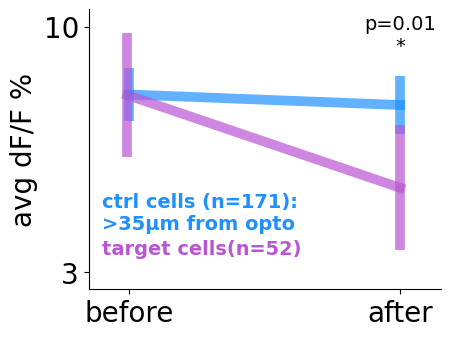

In [126]:
fig= plt.figure(figsize=(10,8))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['dodgerblue', 'mediumorchid']
font = {'size'   : 20}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')

avg_notStim = np.array([avg_visresp_pre_notStim[3],avg_visresp_post_notStim[3]])
avg_bhav = np.array([avg_visresp_pre_bhavStim[3],avg_visresp_post_bhavStim[3]])

sem_notStim = np.array([sem_visresp_pre_noStim[3],sem_visresp_post_noStim[3]])
sem_bhav = np.array([sem_visresp_pre_bhavStim[3],sem_visresp_post_bhavStim[3]])


ax1 = fig.add_subplot(221+plots)
ax1.errorbar([0,1],avg_notStim,yerr=sem_notStim,color=colors[0],lw=7,alpha=0.7)
ax1.errorbar([-0.007,1],avg_bhav,yerr=sem_bhav,color=colors[1],lw=7,alpha=0.7)
#ax1.fill_between([0,1],avg_notStim+sem_notStim,avg_notStim-sem_notStim,color=colors[0],alpha=0.4)
#ax1.fill_between([0,1],avg_bhav+sem_bhav,avg_bhav-sem_bhav,color=colors[1],alpha=0.1)
#ax1.set_xlabel('orientation')
ax1.set_xticks([0,1]); ax1.set_xticklabels(['before','after'])
ax1.set_ylabel('avg dF/F %')
ax1.set_ylim([2.5,10.5]); ax1.set_yticks([3,10])#ax1.set_yticks([6.24,11.24]); ax1.set_yticklabels([-5,0])
ax1.set_xlim([-0.15,1.15])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(1,9.3,'p=0.01\n*',size=14, c='black',ha='center')
ax1.text(-.1,4.2,'ctrl cells (n=171):\n>35µm from opto',weight='bold',size=14, c=colors[0])
ax1.text(-.1,3.5,'target cells(n=52)',weight='bold',size=14, c=colors[1])
#plt.savefig('/Users/friedmanng/Desktop/cosyne2024/avg_change_vis.png',bbox_inches='tight',dpi=400)

In [ ]:
fig= plt.figure(figsize=(10,8))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['dodgerblue', 'mediumorchid']
font = {'size'   : 20}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')

avg_notStim = np.array([avg_visresp_pre_notStim[3],avg_visresp_post_notStim[3]])
avg_bhav = np.array([avg_visresp_pre_bhavStim[3],avg_visresp_post_bhavStim[3]])

sem_notStim = np.array([sem_visresp_pre_noStim[3],sem_visresp_post_noStim[3]])
sem_bhav = np.array([sem_visresp_pre_bhavStim[3],sem_visresp_post_bhavStim[3]])


ax1 = fig.add_subplot(221+plots)
ax1.errorbar([0,1],avg_notStim,yerr=sem_notStim,color=colors[0],lw=7,alpha=0.7)
ax1.errorbar([-0.007,1],avg_bhav,yerr=sem_bhav,color=colors[1],lw=7,alpha=0.7)
#ax1.fill_between([0,1],avg_notStim+sem_notStim,avg_notStim-sem_notStim,color=colors[0],alpha=0.4)
#ax1.fill_between([0,1],avg_bhav+sem_bhav,avg_bhav-sem_bhav,color=colors[1],alpha=0.1)
#ax1.set_xlabel('orientation')
ax1.set_xticks([0,1]); ax1.set_xticklabels(['before','after'])
ax1.set_ylabel('avg dF/F %')
ax1.set_ylim([2.5,10.5]); ax1.set_yticks([3,10])#ax1.set_yticks([6.24,11.24]); ax1.set_yticklabels([-5,0])
ax1.set_xlim([-0.15,1.15])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(1,9.3,'p=0.01\n*',size=14, c='black',ha='center')
ax1.text(-.1,4.2,'ctrl cells (n=171):\n>35µm from opto',weight='bold',size=14, c=colors[0])
ax1.text(-.1,3.5,'target cells(n=52)',weight='bold',size=14, c=colors[1])
#plt.savefig('/Users/friedmanng/Desktop/cosyne2024/avg_change_vis.png',bbox_inches='tight',dpi=400)

In [ ]:
fig= plt.figure(figsize=(10,8))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['dodgerblue', 'mediumorchid']
font = {'size'   : 20}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')

avg_notStim = np.array([avg_visresp_pre_notStim[0],avg_visresp_post_notStim[0]])
avg_bhav = np.array([avg_visresp_pre_bhavStim[0],avg_visresp_post_bhavStim[0]])

sem_notStim = np.array([sem_visresp_pre_noStim[0],sem_visresp_post_noStim[0]])
sem_bhav = np.array([sem_visresp_pre_bhavStim[0],sem_visresp_post_bhavStim[0]])


ax1 = fig.add_subplot(221+plots)
ax1.errorbar([0,1],avg_notStim,yerr=sem_notStim,color=colors[0],lw=7,alpha=0.7)
ax1.errorbar([-0.007,1],avg_bhav,yerr=sem_bhav,color=colors[1],lw=7,alpha=0.7)
ax1.set_xticks([0,1]); ax1.set_xticklabels(['before','after'])
ax1.set_ylabel('avg dF/F %')
ax1.set_ylim([4,17]); ax1.set_yticks([5,15])#ax1.set_yticks([6.24,11.24]); ax1.set_yticklabels([-5,0])
ax1.set_xlim([-0.15,1.15])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.text(1,9.3,'p=0.01\n*',size=14, c='black',ha='center')
ax1.text(-.1,12.2,'ctrl cells (n=232):\n>35µm from opto',weight='bold',size=14, c=colors[0])
ax1.text(-.1,14.8,'target cells(n=52)',weight='bold',size=14, c=colors[1])
#plt.savefig('/Users/friedmanng/Desktop/cosyne2024/avg_change_vis_ortho.png',bbox_inches='tight',dpi=400)

In [ ]:
#visResp_behavStim_post[visResp_behavStim_post<0]=0
#visResp_notStim_post[visResp_notStim_post<0]=0

In [ ]:
fig= plt.figure(figsize=(12,8))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['dodgerblue', 'mediumorchid']
font = {'size'   : 20}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')

avg_notStim = np.array([avg_visresp_pre_notStim[3],avg_visresp_post_notStim[3]])
avg_bhav = np.array([avg_visresp_pre_bhavStim[3],avg_visresp_post_bhavStim[3]])

sem_notStim = np.array([sem_visresp_pre_noStim[3],sem_visresp_post_noStim[3]])
sem_bhav = np.array([sem_visresp_pre_bhavStim[3],sem_visresp_post_bhavStim[3]])


ax1 = fig.add_subplot(221+plots)
ax1.errorbar([0,1],avg_notStim,yerr=sem_notStim,color=colors[0],lw=5,alpha=0.7)
ax1.errorbar([-0.007,1],avg_bhav,yerr=sem_bhav,color=colors[1],lw=5,alpha=0.7)
#ax1.fill_between([0,1],avg_notStim+sem_notStim,avg_notStim-sem_notStim,color=colors[0],alpha=0.4)
#ax1.fill_between([0,1],avg_bhav+sem_bhav,avg_bhav-sem_bhav,color=colors[1],alpha=0.1)
#ax1.set_xlabel('orientation')
ax1.set_xticks([0,1]); ax1.set_xticklabels(['before','after'])
ax1.set_ylabel('avg dF/F %')
ax1.set_ylim([2.5,10.5]); ax1.set_yticks([3,10])#ax1.set_yticks([6.24,11.24]); ax1.set_yticklabels([-5,0])
ax1.set_xlim([-0.15,1.15])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(0.9,9.3,'p=0.01\n     *',size=14, c='black')
ax1.text(-.1,4.2,'ctrl cells (n=171):\n>35µm from opto',weight='bold',size=14, c=colors[0])
ax1.text(-.1,3.5,'target cells(n=52)',weight='bold',size=14, c=colors[1])
plt.savefig('/Users/phillipscm/Desktop/COSYNE 2025/241011ForConnor/avg_change.png',bbox_inches='tight',dpi=400)

### single mice change

In [ ]:
dfoF_V_avg_array_pre_active

In [ ]:
np.std([19, 17, 16])

In [ ]:
dfoF_V_avg_array_pre_active = np.copy(pre_arrs_i5214['visResp_behavStim_pre'])
dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(post_arrs_i5214['visResp_behavStim_post'])
dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0); avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0); avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
dfoF_V_change_bhStim_i5214 = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active
avg_visresp_pre_bhavStim_i5214 = np.copy(avg_visresp_pre)
avg_visresp_post_bhavStim_i5214 = np.copy(avg_visresp_post)
##
dfoF_V_avg_array_pre_active = np.copy(pre_arrs_i5214['visResp_ctrl35um_pre'])
dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(post_arrs_i5214['visResp_ctrl35um_post'])
dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0); avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0); avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
dfoF_V_change_ctrl_i5214 = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active
avg_visresp_pre_ctrl_i5214 = np.copy(avg_visresp_pre)
avg_visresp_post_ctrl_i5214 = np.copy(avg_visresp_post)
#######
dfoF_V_avg_array_pre_active = np.copy(pre_arrs_i5273['visResp_behavStim_pre'])
dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(post_arrs_i5273['visResp_behavStim_post'])
dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0); avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0); avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
dfoF_V_change_bhStim_i5273 = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active
avg_visresp_pre_bhavStim_i5273 = np.copy(avg_visresp_pre)
avg_visresp_post_bhavStim_i5273 = np.copy(avg_visresp_post)
##
dfoF_V_avg_array_pre_active = np.copy(pre_arrs_i5273['visResp_ctrl35um_pre'])
dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(post_arrs_i5273['visResp_ctrl35um_post'])
dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0); avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0); avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
dfoF_V_change_ctrl_i5273 = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active
avg_visresp_pre_ctrl_i5273 = np.copy(avg_visresp_pre)
avg_visresp_post_ctrl_i5273 = np.copy(avg_visresp_post)
#######
dfoF_V_avg_array_pre_active = np.copy(pre_arrs_i5309['visResp_behavStim_pre'])
dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(post_arrs_i5309['visResp_behavStim_post'])
dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0); avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0); avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
dfoF_V_change_bhStim_i5309 = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active
avg_visresp_pre_bhavStim_i5309 = np.copy(avg_visresp_pre)
avg_visresp_post_bhavStim_i5309 = np.copy(avg_visresp_post)
##
dfoF_V_avg_array_pre_active = np.copy(pre_arrs_i5309['visResp_ctrl35um_pre'])
dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(post_arrs_i5309['visResp_ctrl35um_post'])
dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0); avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0); avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
dfoF_V_change_ctrl_i5309 = dfoF_V_avg_array_post_active-dfoF_V_avg_array_pre_active
avg_visresp_pre_ctrl_i5309 = np.copy(avg_visresp_pre)
avg_visresp_post_ctrl_i5309 = np.copy(avg_visresp_post)
#######

In [ ]:
fig= plt.figure(figsize=(6,10))
#tuning_titles = ['pre', 'post']; colors = ['mediumorchid', 'gold']
font = {'size'   : 20}
mpl.rc('font', **font)

avg_manip_i5214 = avg_visresp_post_bhavStim_i5214-avg_visresp_pre_bhavStim_i5214
avg_ctrl_i5214 = avg_visresp_post_ctrl_i5214-avg_visresp_pre_ctrl_i5214
avg_manip_i5273 = avg_visresp_post_bhavStim_i5273-avg_visresp_pre_bhavStim_i5273
avg_ctrl_i5273 = avg_visresp_post_ctrl_i5273-avg_visresp_pre_ctrl_i5273
avg_manip_i5309 = avg_visresp_post_bhavStim_i5309-avg_visresp_pre_bhavStim_i5309
avg_ctrl_i5309 = avg_visresp_post_ctrl_i5309-avg_visresp_pre_ctrl_i5309

difs = [[avg_manip_i5309, avg_ctrl_i5309],[avg_manip_i5214, avg_ctrl_i5214],[avg_manip_i5273, avg_ctrl_i5273]]


for plots in range(3):
    ax = fig.add_subplot(311+plots)
    ax.plot(difs[plots][0],color=colors[1],lw=4,label='directly manipulated')
    ax.plot(difs[plots][1],color=colors[0],lw=4,label='>35um from holo disk')
    ax.set_xlabel('orientation',fontsize=30) if plots == 2 else None
    ax.set_xticks([0,3,6]); ax.set_xticklabels(['-90°','0°','90°'])
    ax.set_ylabel('Δ in df/f',labelpad=12,size=30) if plots == 1 else None
    ax.set_ylim([-7,10]); ax.set_xlim([-0.5,6.5])
    ax.text(0.6,7.5,f'Mouse {plots+1}') if plots == 0 else ax.text(0.7,6,f'Mouse {plots+1}')
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.axhline(c='grey',alpha=0.3,ls=':'); ax.axvline(x=3,c='black',alpha=0.5, ls='--',lw=2, label='co-stim ori')
    ax.legend(loc=(0.7,0.1),fontsize=9,frameon=False) if plots == 0 else None
    plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
    #plt.savefig(file_path_save+'changeplot_indivMice.png',bbox_inches='tight',dpi=400)

### all cells

In [ ]:
dfoF_V_avg_array_pre_active[2]

In [ ]:
#polar plots avgs
title = 'Visual tuning of all cells'
# What does nan mean for the
dfoF_V_avg_array_pre_active = np.copy(visResp_alliC_pre)#[i_manipResponsive,:])
dfoF_V_avg_array_pre_active[dfoF_V_avg_array_pre_active < 0] = np.nan
dfoF_V_avg_array_post_active = np.copy(visResp_alliC_post)#[i_manipResponsive,:])
dfoF_V_avg_array_post_active[dfoF_V_avg_array_post_active < 0] = np.nan

avg_visresp_pre = np.nanmean(dfoF_V_avg_array_pre_active, axis=0)
avg_visresp_pre = np.concatenate((avg_visresp_pre, avg_visresp_pre[:1]))
sem_visresp_pre = stats.sem(dfoF_V_avg_array_pre_active, axis=(0),nan_policy='omit')
sem_visresp_pre = np.concatenate((sem_visresp_pre, sem_visresp_pre[:1]))

avg_visresp_post = np.nanmean(dfoF_V_avg_array_post_active, axis=0)
avg_visresp_post = np.concatenate((avg_visresp_post, avg_visresp_post[:1]))
sem_visresp_post = stats.sem(dfoF_V_avg_array_post_active, axis=(0),nan_policy='omit')
sem_visresp_post = np.concatenate((sem_visresp_post, sem_visresp_post[:1]))

avg_visresps = np.array([avg_visresp_pre, avg_visresp_post])
sem_visresps = np.array([sem_visresp_pre, sem_visresp_post])

xs = [0,np.pi*0.167,np.pi*0.333,np.pi*0.5,np.pi*0.667,np.pi*0.833,np.pi]

fig= plt.figure(figsize=(10,8))
fig.text(0.5, 1.02, title, ha='center', va='center', fontsize=30, fontweight='bold')
tuning_titles = ['pre', 'post']; colors = ['mediumorchid', 'gold']
font = {'size'   : 20}
mpl.rc('font', **font)

for plots in range(2):
    ax1 = fig.add_subplot(221+plots, projection='polar')
    ax1.plot(xs,avg_visresps[plots, :],color=colors[plots],lw=2)
    ax1.fill_between(xs,avg_visresps[plots, :]+sem_visresps[plots, :],avg_visresps[plots, :]-sem_visresps[plots, :],color=colors[plots],alpha=0.2)
    ax1.set_rmax(10); ax1.set_rticks([10])  # Less radial ticks
    ax1.set_xlabel('df/f'); ax1.set_title(tuning_titles[plots], va='bottom')
    ax1.grid(True)
    
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()

### OSI

#### The following cell should only be run once - otherwise restart notebook

In [ ]:
osi_bh_pre = np.full(visResp_behavStim_pre.shape[0],np.nan)
osi_bh_post = np.full(visResp_behavStim_post.shape[0],np.nan)

visResp_notStim_pre = visResp_notStim_pre[i_notStimResponsive,:]
visResp_notStim_post = visResp_notStim_post[i_notStimResponsive,:]

osi_no_pre = np.full(visResp_notStim_pre.shape[0],np.nan)
osi_no_post = np.full(visResp_notStim_post.shape[0],np.nan)

pref_bh_pre = np.argmax(visResp_behavStim_pre,axis=1)
pref_bh_post = np.argmax(visResp_behavStim_post,axis=1)
pref_no_pre = np.argmax(visResp_notStim_pre,axis=1)
pref_no_post = np.argmax(visResp_notStim_post,axis=1)

for i in range(pref_bh_pre.shape[0]):
    if pref_bh_pre[i] < 3:
        osi_bh_pre[i] = (visResp_behavStim_pre[i,pref_bh_pre[i]]-visResp_behavStim_pre[i,pref_bh_pre[i]+3])/visResp_behavStim_pre[i,pref_bh_pre[i]]
    else:
        osi_bh_pre[i] = (visResp_behavStim_pre[i,pref_bh_pre[i]]-visResp_behavStim_pre[i,pref_bh_pre[i]-3])/visResp_behavStim_pre[i,pref_bh_pre[i]]
    if pref_bh_post[i] < 3:
        osi_bh_post[i] = (visResp_behavStim_post[i,pref_bh_post[i]]-visResp_behavStim_post[i,pref_bh_post[i]+3])/visResp_behavStim_post[i,pref_bh_post[i]]
    else:
        osi_bh_post[i] = (visResp_behavStim_post[i,pref_bh_post[i]]-visResp_behavStim_post[i,pref_bh_post[i]-3])/visResp_behavStim_post[i,pref_bh_post[i]]

for i in range(pref_no_pre.shape[0]):
    if pref_no_pre[i] < 3:
        osi_no_pre[i] = (visResp_notStim_pre[i,pref_no_pre[i]]-visResp_notStim_pre[i,pref_no_pre[i]+3])/visResp_notStim_pre[i,pref_no_pre[i]]
    else:
        osi_no_pre[i] = (visResp_notStim_pre[i,pref_no_pre[i]]-visResp_notStim_pre[i,pref_no_pre[i]-3])/visResp_notStim_pre[i,pref_no_pre[i]]
    if pref_no_post[i] < 3:
        osi_no_post[i] = (visResp_notStim_post[i,pref_no_post[i]]-visResp_notStim_post[i,pref_no_post[i]+3])/visResp_notStim_post[i,pref_no_post[i]]
    else:
        osi_no_post[i] = (visResp_notStim_post[i,pref_no_post[i]]-visResp_notStim_post[i,pref_no_post[i]-3])/visResp_notStim_post[i,pref_no_post[i]]


In [ ]:
osi_bh_post[19] = 4 #was 40 and skewing it. I am letting osi be > 1 by keeping in negatives
print(np.nanmean(osi_bh_pre))
print(np.nanmean(osi_no_pre))
print(np.nanmean(osi_bh_post))
print(np.nanmean(osi_no_post))

In [ ]:
osi_bh_pre = np.full(visResp_behavStim_pre.shape[0],np.nan)
osi_bh_post = np.full(visResp_behavStim_post.shape[0],np.nan)


visResp_ctrlOSI_pre = np.copy(visResp_notStim_pre)
visResp_ctrlOSI_post =  np.copy(visResp_notStim_post)
visResp_ctrlOSI_pre[visResp_ctrlOSI_pre<0] = 0
visResp_ctrlOSI_post[visResp_ctrlOSI_post<0] = 0

visResp_bhOSI_pre = np.copy(visResp_behavStim_pre)
visResp_bhOSI_post =  np.copy(visResp_behavStim_post)
visResp_bhOSI_pre[visResp_bhOSI_pre<0] = 0
visResp_bhOSI_post[visResp_bhOSI_post<0] = 0

osi_no_pre = np.full(visResp_notStim_pre.shape[0],np.nan)
osi_no_post = np.full(visResp_notStim_post.shape[0],np.nan)

pref_bh_pre = np.argmax(visResp_bhOSI_pre,axis=1)
pref_bh_post = np.argmax(visResp_bhOSI_post,axis=1)
pref_no_pre = np.argmax(visResp_ctrlOSI_pre,axis=1)
pref_no_post = np.argmax(visResp_ctrlOSI_post,axis=1)

for i in range(pref_bh_pre.shape[0]):
    if pref_bh_pre[i] < 3:
        osi_bh_pre[i] = (visResp_bhOSI_pre[i,pref_bh_pre[i]]-visResp_bhOSI_pre[i,pref_bh_pre[i]+3])/visResp_bhOSI_pre[i,pref_bh_pre[i]]
    else:
        osi_bh_pre[i] = (visResp_bhOSI_pre[i,pref_bh_pre[i]]-visResp_bhOSI_pre[i,pref_bh_pre[i]-3])/visResp_bhOSI_pre[i,pref_bh_pre[i]]
    if pref_bh_post[i] < 3:
        osi_bh_post[i] = (visResp_bhOSI_post[i,pref_bh_post[i]]-visResp_bhOSI_post[i,pref_bh_post[i]+3])/visResp_bhOSI_post[i,pref_bh_post[i]]
    else:
        osi_bh_post[i] = (visResp_bhOSI_post[i,pref_bh_post[i]]-visResp_bhOSI_post[i,pref_bh_post[i]-3])/visResp_bhOSI_post[i,pref_bh_post[i]]

for i in range(pref_no_pre.shape[0]):
    if pref_no_pre[i] < 3:
        osi_no_pre[i] = (visResp_ctrlOSI_pre[i,pref_no_pre[i]]-visResp_ctrlOSI_pre[i,pref_no_pre[i]+3])/visResp_ctrlOSI_pre[i,pref_no_pre[i]]
    else:
        osi_no_pre[i] = (visResp_ctrlOSI_pre[i,pref_no_pre[i]]-visResp_ctrlOSI_pre[i,pref_no_pre[i]-3])/visResp_ctrlOSI_pre[i,pref_no_pre[i]]
    if pref_no_post[i] < 3:
        osi_no_post[i] = (visResp_ctrlOSI_post[i,pref_no_post[i]]-visResp_ctrlOSI_post[i,pref_no_post[i]+3])/visResp_ctrlOSI_post[i,pref_no_post[i]]
    else:
        osi_no_post[i] = (visResp_ctrlOSI_post[i,pref_no_post[i]]-visResp_ctrlOSI_post[i,pref_no_post[i]-3])/visResp_ctrlOSI_post[i,pref_no_post[i]]


In [ ]:
print(np.nanmean(osi_bh_pre))
print(np.nanmean(osi_no_pre))
print(np.nanmean(osi_bh_post))
print(np.nanmean(osi_no_post))

In [ ]:
osi_bh_pre_sort = np.sort(osi_bh_pre)
osi_bh_pre_cdf = np.arange(1, len(osi_bh_pre) + 1) / len(osi_bh_pre)

osi_no_pre_sort = np.sort(osi_no_pre)
osi_no_pre_cdf = np.arange(1, len(osi_no_pre) + 1) / len(osi_no_pre)

osi_bh_post_sort = np.sort(osi_bh_post)
osi_bh_post_cdf = np.arange(1, len(osi_bh_post) + 1) / len(osi_bh_post)

osi_no_post_sort = np.sort(osi_no_post)
osi_no_post_cdf = np.arange(1, len(osi_no_post) + 1) / len(osi_no_post)

In [ ]:
fig, ax = plt.subplots()
plt.plot(osi_bh_pre_sort,osi_bh_pre_cdf,marker='.',linestyle='none', label="target cells: pre")
plt.plot(osi_no_pre_sort,osi_no_pre_cdf,marker='.', linestyle='none', label="ctrl cells: pre")
plt.plot(osi_bh_post_sort,osi_bh_post_cdf,marker='.',linestyle='none', label="target cells: post")
plt.plot(osi_no_post_sort,osi_no_post_cdf,marker='.', linestyle='none', label="ctrl cells: post")
plt.xlabel('osi')
#plt.axvline(x=0, color='r', linestyle='--')
#plt.xlim([-20,20])
plt.ylabel('cdf')
plt.yticks([])
plt.title('OSI CDF')
plt.legend(fontsize=10,frameon=False)
fig.savefig('/Users/phillipscm/Desktop/COSYNE 2025/241011ForConnor/cdf_osi.png', bbox_inches="tight")

### Counts of cells with preferred tuning

In [ ]:
pref_bh_pre_adj = np.repeat(pref_bh_pre[:, np.newaxis], 171, axis=1).flatten()
pref_bh_post_adj = np.repeat(pref_bh_post[:, np.newaxis], 171, axis=1).flatten()
pref_no_pre_adj = np.repeat(pref_no_pre[:, np.newaxis], 52, axis=1).flatten()
pref_no_post_adj = np.repeat(pref_no_post[:, np.newaxis], 52, axis=1).flatten()

In [ ]:
fig= plt.figure(figsize=(10,8))
tuning_titles = ['pre', 'post']; colors = ['mediumorchid', 'gray']
font = {'size'   : 20}
mpl.rc('font', **font)

for plots in range(2):
    ax = fig.add_subplot(221+plots)
    if plots == 0:
        ax.hist(pref_bh_pre_adj,rwidth=0.4,bins=6,range=(0,6),label='manip pre',align='left',alpha=0.7,color=colors[0])
        ax.hist(pref_no_pre_adj,rwidth=0.4,bins=6,range=(0,6),label='ctrl pre',align='mid',stacked=False,alpha=0.7,color=colors[1])
        ax.legend(fontsize=10)#[0,1],['manip pre', 'manip pre'],fontsize=10)
        ax.set_xticks([0.25,1.25,2.25,3.25,4.25,5.25])
        ax.set_xticklabels(['0°','30°','60°','90°','120°','150°'],fontsize=15)
    if plots == 1:        
        ax.hist(pref_bh_post_adj,rwidth=0.4,bins=6,range=(0,6),label='manip post',align='left',color=colors[0],alpha=0.7)
        ax.hist(pref_no_post_adj,rwidth=0.4,bins=6,range=(0,6),label='ctrl post',align='mid',color=colors[1],alpha=0.7)
        ax.legend(fontsize=10)
        ax.set_xticks([0.25,1.25,2.25,3.25,4.25,5.25])
        ax.set_xticklabels(['0°','30°','60°','90°','120°','150°'],fontsize=15)

In [ ]:
# for cdf
oris=6
cdf_bh_osi_pre = np.full(oris, np.nan)
cdf_ctrl_osi_pre = np.full(oris, np.nan)

for i in range(oris):
    cdf_bh_osi_pre[i] = sum(pref_bh_pre == i)
    cdf_ctrl_osi_pre[i] = sum(pref_no_pre == i)
    if i > 0:
        cdf_bh_osi_pre[i] = cdf_bh_osi_pre[i] + cdf_bh_osi_pre[i-1]
        cdf_ctrl_osi_pre[i] = cdf_ctrl_osi_pre[i] + cdf_ctrl_osi_pre[i-1]
cdf_bh_osi_pre = cdf_bh_osi_pre/cdf_bh_osi_pre[oris-1]
cdf_ctrl_osi_pre = cdf_ctrl_osi_pre/cdf_ctrl_osi_pre[oris-1]
cdf_bh_osi_pre = np.concatenate((np.array([0]),cdf_bh_osi_pre))
cdf_ctrl_osi_pre = np.concatenate((np.array([0]),cdf_ctrl_osi_pre))

div_90_ctrl = (cdf_ctrl_osi_pre[6]-cdf_ctrl_osi_pre[5])/2
div_90_bh = (cdf_bh_osi_pre[6]-cdf_bh_osi_pre[5])/2
cdf_ctrl_osi_pre[0] = cdf_ctrl_osi_pre[0] + div_90_ctrl
cdf_bh_osi_pre[0] = cdf_bh_osi_pre[0] + div_90_bh

In [ ]:
# for cdf
oris=6
cdf_bh_osi_post = np.full(oris, np.nan)
cdf_ctrl_osi_post = np.full(oris, np.nan)

for i in range(oris):
    cdf_bh_osi_post[i] = sum(pref_bh_post == i)
    cdf_ctrl_osi_post[i] = sum(pref_no_post == i)
    if i > 0:
        cdf_bh_osi_post[i] = cdf_bh_osi_post[i] + cdf_bh_osi_post[i-1]
        cdf_ctrl_osi_post[i] = cdf_ctrl_osi_post[i] + cdf_ctrl_osi_post[i-1]
cdf_bh_osi_post = cdf_bh_osi_post/cdf_bh_osi_post[oris-1]
cdf_ctrl_osi_post = cdf_ctrl_osi_post/cdf_ctrl_osi_post[oris-1]

In [ ]:
xs = [0,1,2,3,4,5,6]

fig, ax = plt.subplots(figsize = (5, 5), sharey=True)
font = {'size'   : 25}
mpl.rc('font', **font)
ax.step(xs,cdf_bh_osi_pre,lw=7,c=colors[1])
ax.step(xs,cdf_ctrl_osi_pre,lw=7,c=colors[0])
ax.set_ylabel('fraction of cells',labelpad=-10);ax.set_xlabel('preferred orientation');
ax.set_yticks([0,1]); ax.set_yticklabels([0,1],size=20),ax.set_xticks([0,1,2,3,4,5,6]);ax.set_xticklabels(['-90°','-60°','-30°','0°','30°','60°','90°'],size=20)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.text(2.3,0.22,'ctrl cells (n=171):\n>35µm from opto',weight='bold',size=18, c=colors[0])
ax.text(2,0.13,'target cells (n=52)',weight='bold',size=18, c=colors[1])
plt.savefig('/Users/phillipscm/Desktop/COSYNE 2025/241011ForConnor/cdf_preori.png',bbox_inches='tight',dpi=400)

In [ ]:
import scipy.interpolate as interp
# Increase this value to increase the points of interpolation
num_points = 50

# Test data
x = np.array([-120, -90, -60, -30, 0, 30, 60])
y = np.array([0, 0.1, 0.3, 0.4, 0.7, 0.8, 0.95])

# Creates cubic spline 
cs = interp.CubicSpline(x,y)

# Create list of x to interpolate
xs = np.linspace(x[0],x[-1], num = num_points)

In [ ]:
stat, p_pre = stats.mannwhitneyu(pref_bh_pre, pref_no_pre)

In [ ]:
stat, p_post = stats.mannwhitneyu(pref_bh_post, pref_no_post)
p_post

In [ ]:
# Create list of x to interpolate
num_points = 14
xs = np.linspace(x[0],x[-1], num = num_points)
xs_ticks = [xs.min(), xs.max()]

fig, ax = plt.subplots(figsize = (7, 7), sharey=True)
font = {'size'   : 23}
mpl.rc('font', **font)

# Creates cubic spline 
cs_bh_pre = interp.CubicSpline(x,cdf_bh_osi_pre)
ax.plot(xs,cs_bh_pre(xs),c=colors[1],lw=6)
cs_ctrl_pre = interp.CubicSpline(x,cdf_ctrl_osi_pre)
ax.plot(xs,cs_ctrl_pre(xs),c=colors[0],lw=6)

ax.set_ylabel('fraction of cells',labelpad=-10);ax.set_xlabel('preferred orientation');
ax.set_yticks([0,1]); ax.set_yticklabels([0,1],size=25);ax.set_xticks(xs_ticks);ax.set_xticklabels(['0°','150°'],size=25)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.text(-43,0.2,'ctrl cells (n=171):\n>35µm from opto',weight='bold',size=17, c=colors[0])
ax.text(-43,0.1,'target cells (n=52)',weight='bold',size=17, c=colors[1])
#ax.text(-93,0.45,'p=0.69',size=17, c='black')
plt.savefig('/Users/phillipscm/Downloads/241021-figs/cdf_preori_interpolated.png',bbox_inches='tight',dpi=400)

In [ ]:
val_pref_bh_pre, counts_pref_bh_pre = np.unique(pref_bh_pre, return_counts=True)
val_pref_no_pre, counts_pref_no_pre = np.unique(pref_no_pre, return_counts=True)
val_pref_bh_post, counts_pref_bh_post = np.unique(pref_bh_post, return_counts=True)
val_pref_no_post, counts_pref_no_post = np.unique(pref_no_post, return_counts=True)

In [ ]:
counts_pref_bh_dif = counts_pref_bh_post-counts_pref_bh_pre
counts_pref_no_dif = counts_pref_no_post-counts_pref_no_pre

### Scatter

In [ ]:
d0resp = np.full(visResp_behavStim_post.shape[0],np.nan)

visResp_bhOSI_pre = np.copy(visResp_behavStim_pre)
visResp_bhOSI_post =  np.copy(visResp_behavStim_post)

for i in range(visResp_bhOSI_pre.shape[0]):
    d0resp[i] = visResp_bhOSI_post[i,0]-visResp_bhOSI_pre[i,0]

In [ ]:
visResp_behavStim_post.shape

In [ ]:
d90resp = np.full(visResp_behavStim_post.shape[0],np.nan)

visResp_bhOSI_pre = np.copy(visResp_behavStim_pre)
visResp_bhOSI_post =  np.copy(visResp_behavStim_post)

for i in range(visResp_bhOSI_pre.shape[0]):
    d90resp[i] = visResp_bhOSI_post[i,3]-visResp_bhOSI_pre[i,3]

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5), sharey=True)

font = {'size'   : 20}; mpl.rc('font', **font)
ax.scatter(visResp_bhOSI_pre[:,0], d0resp, alpha=0.7)

sort_idx = np.argsort(visResp_bhOSI_pre[:,0])
xout, yout, wout = loess_1d(visResp_bhOSI_pre[:,0][sort_idx], d0resp[sort_idx], frac=0.7, rotate=False)

#ax.set_xlim([-10,10])#; ax.set_ylim([0,30])
ax.set_xlabel("response to orthogonal vis stim (dF/F %)",size=14); ax.set_ylabel("Δ in response (dF/F%)",size=14)
plt.plot(xout[:], yout[:], color='red', linewidth=2, alpha=0.6)
ax.set_title("Manipulated cells")
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
#do a lowess not linear 
fig.savefig(os.path.join(file_path_save,'zeroPrevsDelta.png'), bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5), sharey=True)
font = {'size'   : 22};  mpl.rc('font', **font)
sort_idx = np.argsort(visResp_bhOSI_pre[:,3])
xout, yout, wout = loess_1d(visResp_bhOSI_pre[:,3][sort_idx], d90resp[sort_idx], frac=0.5, rotate=False)

# Plot the original data and the smoothed LOWESS curve
plt.scatter(visResp_bhOSI_pre[:,3],d90resp, alpha=0.6, c='mediumorchid', s=90)
plt.plot(xout[:-1], yout[:-1], color='black', linewidth=2, alpha=0.5)
ax.set_yticks([-30, 0, 20]); ax.set_xticks([0,50])
#ax.set_xlabel("resp to target stim (dF/F %)")

ax.text(-27, -27,"Δ in",rotation='vertical')
ax.text(-27, -17, "target",c='mediumorchid',rotation='vertical',weight='semibold')
ax.text(-27, -1,"resp (dF/F %)",rotation='vertical')

ax.text(-10, -42,"resp to")
ax.text(13.5, -42, "target",c='mediumorchid',weight='semibold')
ax.text(37, -42,"ori (dF/F%)")
ax.axhline(c='grey',alpha=0.8,ls=':')
#ax.set_ylabel("Δ in target resp (dF/F%)",c='mediumorchid',weight='bold',rotation='vertical')

#ax.set_title("Manipulated cells")
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
#plt.savefig('/Users/friedmanng/Desktop/cosyne2024/scattarget.png',bbox_inches='tight',dpi=400)

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5), sharey=True)
font = {'size'   : 22};  mpl.rc('font', **font)

plt.scatter(visResp_bhOSI_pre[:,3],d90resp, alpha=0.6, c='mediumorchid', s=90)
slope, intercept, r, p, se = stats.linregress(visResp_bhOSI_pre[:,3],d90resp)
xs = np.arange(visResp_bhOSI_pre[:,3].min(),visResp_bhOSI_pre[:,3].max())
ys = (slope*xs)+intercept
plt.plot(xs, ys)
ax.set_yticks([-30, 0, 20]); ax.set_xticks([0,50])
#ax.set_xlabel("resp to target stim (dF/F %)")
ax.text(-27, -27,"Δ in",rotation='vertical')
ax.text(-27, -17, "target",c='mediumorchid',rotation='vertical',weight='semibold')
ax.text(-27, -1,"resp (dF/F %)",rotation='vertical')
print(slope,intercept, r, p, se)
ax.text(-10, -42,"resp to")
ax.text(13.5, -42, "target",c='mediumorchid',weight='semibold')
ax.text(37, -42,"ori (dF/F%)")
ax.axhline(c='grey',alpha=0.8,ls=':')
print(f'this shows that change in target response does significantly correlate with initial response to target p={p}')

ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
#plt.savefig('/Users/friedmanng/Desktop/cosyne2024/scattarget_linear.png',bbox_inches='tight',dpi=400)

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5), sharey=True)

font = {'size'   : 24}; mpl.rc('font', **font)
ax.scatter(visResp_bhOSI_pre[:,0], d0resp, alpha=0.6,c='forestgreen', s=90)
slope, intercept, r, p, se = stats.linregress(visResp_bhOSI_pre[:,0], d0resp)
xs = np.arange(visResp_bhOSI_pre[:,0].min(),visResp_bhOSI_pre[:,0].max())
ys = (slope*xs)+intercept
plt.plot(xs, ys, lw=2, c='black')
print(slope,intercept, r, p, se)
print(f'this shows that change in orthogonal response does not significantly correlate with initial response to ortho p={p}')

ax.set_xticks([0,60]); ax.set_yticks([0,80])
ax.text(-32, -18.5,"Δ in",rotation='vertical')
ax.text(-32, 1.4, "ortho",c='forestgreen',rotation='vertical', weight='semibold')
ax.text(-32, 31.5,"resp (dF/F %)",rotation='vertical')
ax.text(-17.4, -39,"resp to")
ax.text(9.5, -39, "ortho",c='forestgreen', weight='semibold')
ax.text(33, -39,"ori (dF/F%)")
ax.text(-17.4, -39,"resp to")

ax.axhline(c='grey',alpha=0.8,ls=':')
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
plt.savefig('/Users/phillipscm/Desktop/COSYNE 2025/241011ForConnor/scatortho.png',bbox_inches='tight',dpi=400)

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5), sharey=True)

sort_idx = np.argsort(visResp_bhOSI_pre[:,3])
xout, yout, wout = loess_1d(visResp_bhOSI_pre[:,3][sort_idx], d90resp[sort_idx], frac=0.5, rotate=False)

# Plot the original data and the smoothed LOWESS curve
plt.scatter(visResp_bhOSI_pre[:,3],d90resp, alpha=0.5)
plt.plot(xout[:-1], yout[:-1], color='red', linewidth=2)
ax.set_xlabel("response to target vis stim (dF/F %)",size=14); ax.set_ylabel("Δ in response (dF/F%)",size=14)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
#fig.savefig(os.path.join(file_path_save,'90PrevsDelta.png'), bbox_inches="tight")

### two p resp
#### this shows we aren't damaging the 2P stim'd cells. when matching for 2P response, no difference in post

In [ ]:
pref_twoPmanip_pre = np.max(twoP_manip_pre, axis=1)
small_manip_2P = np.where(pref_twoPmanip_pre<40)
print(small_manip_2P[0].shape)
pref_twoPmanip_pre[small_manip_2P].mean()

In [ ]:
pref_twoPctrl_pre = np.max(twoP_ctrl_pre, axis=1)
big_ctrl_2P = np.where(pref_twoPctrl_pre>14.92)
print(big_ctrl_2P[0].shape)
pref_twoPctrl_pre[big_ctrl_2P].mean()

In [ ]:
pref_twoPmanip_post = twoP_manip_post.max(axis=1)
pref_twoPmanip_post[small_manip_2P].mean()

In [ ]:
pref_twoPctrl_post = twoP_ctrl_post.max(axis=1)
pref_twoPctrl_post[big_ctrl_2P].mean()

In [ ]:
fig= plt.figure(figsize=(11,11))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['dodgerblue', 'mediumorchid']
font = {'size'   : 25}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')

avg_notStim = np.array([pref_twoPctrl_pre[big_ctrl_2P].mean(),pref_twoPctrl_post[big_ctrl_2P].mean()])
avg_bhav = np.array([pref_twoPmanip_pre[small_manip_2P].mean(),pref_twoPmanip_post[small_manip_2P].mean()])

sem_notStim = np.array([stats.sem(pref_twoPctrl_pre[big_ctrl_2P]),stats.sem(pref_twoPctrl_post[big_ctrl_2P])])
sem_bhav = np.array([stats.sem(pref_twoPmanip_pre[small_manip_2P]),stats.sem(pref_twoPmanip_post[small_manip_2P])])


ax1 = fig.add_subplot(221+plots)
ax1.errorbar([0,1],avg_bhav-avg_notStim,yerr=sem_bhav,color='black',lw=5,alpha=0.7)
ax1.set_xticks([0,1]); ax1.set_xticklabels(['pre','post'])
#ax1.text(0.9,20,'p>0.05',size=14, c='black')
ax1.set_ylabel('difference in dF/F%')
ax1.set_ylim([-8,8]); ax1.set_yticks([-6,0,6])
ax1.set_xlim([-0.15,1.15])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(0.02,-6,'target cells minus\nctrl cells (n=46)',weight='bold',size=18, c='black')
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()
plt.savefig('/Users/phillipscm/Downloads/241021-figs/avg_change_opto.png',bbox_inches='tight',dpi=400)

In [ ]:
stat, p_post = stats.mannwhitneyu(pref_twoPmanip_post[small_manip_2P],pref_twoPctrl_post[big_ctrl_2P].mean())

In [ ]:
stat, p_pre = stats.mannwhitneyu(pref_twoPmanip_pre[small_manip_2P],pref_twoPctrl_pre[big_ctrl_2P].mean())

In [ ]:
stat, p_pre = stats.mannwhitneyu(pref_twoPmanip_pre[small_manip_2P]-pref_twoPctrl_pre[big_ctrl_2P],pref_twoPmanip_post[small_manip_2P]-pref_twoPctrl_post[big_ctrl_2P])
p_pre

In [ ]:
fig= plt.figure(figsize=(4,4))
#fig.text(0.5, 0.435, '*sub selected visually responsive (df/f>7)\nnot stimd cell pop to match mean vis resp of stimd cells', ha='left', va='center', fontsize=10)
colors = ['dodgerblue', 'mediumorchid']
font = {'size'   : 20}
mpl.rc('font', **font)
#fig.text(0.52, 0.44, 'orientation', ha='center', va='center')

avg_notStim = np.array([pref_twoPctrl_pre[big_ctrl_2P].mean(),pref_twoPctrl_post[big_ctrl_2P].mean()])
avg_bhav = np.array([pref_twoPmanip_pre[small_manip_2P].mean(),pref_twoPmanip_post[small_manip_2P].mean()])

sem_notStim = np.array([stats.sem(pref_twoPctrl_pre[big_ctrl_2P]),stats.sem(pref_twoPctrl_post[big_ctrl_2P])])
sem_bhav = np.array([stats.sem(pref_twoPmanip_pre[small_manip_2P]),stats.sem(pref_twoPmanip_post[small_manip_2P])])


ax1 = fig.add_subplot()
ax1.errorbar([0,1],avg_notStim,yerr=sem_notStim,color=colors[0],lw=7,alpha=0.7)
ax1.errorbar([-0.007,1],avg_bhav,yerr=sem_bhav,color=colors[1],lw=7,alpha=0.7)
ax1.set_xticks([0,1]); ax1.set_xticklabels(['before','after'])
ax1.text(0.9,20,'p>0.05',size=14, c='black')
ax1.set_ylabel('avg dF/F %')
ax1.set_ylim([9,26]); ax1.set_yticks([10,25])
ax1.set_xlim([-0.15,1.15])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.text(-.1,12.5,'ctrl cells (n=24):\n>35µm from opto',weight='bold',size=14, c=colors[0])
ax1.text(-.1,11,'target cells (n=22)',weight='bold',size=14, c=colors[1])
plt.subplots_adjust(wspace=None, hspace=None); plt.tight_layout()